# introductory text (explain: dataset, task)

For this project I am working with two datasets, the Bishop dataset and the Lyle dataset. These datasets both come from the MURR archeometry laboratory database at the Univerity of Missouri. These datasets contain Neutron Activation Analysis (INAA) [link](https://archaeometry.missouri.edu/naa.html) data, which measures the chemical composition of the specific pottery piece from their respective sites in the Maya area. Each pottery sherd or artifact has its own chemical makeup, which means ones that are from similar areas or sites usually have more similar compositions. I will try to classify from which dataset\location (Lyle or Bishop) each sample comes from by using various machine learning algorithms on the chemical data. There are 33 unique elements that are measured in the INAA test, I will try to figure out which models and elements are the best for classification into their respective datasets.

# import requisite modules

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import combinations
from sklearn.utils import Bunch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import combinations
from mpl_toolkits.basemap import Basemap
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# helper functions (if necessary)

In [3]:
def getstatistic(s):
    return stats.shapiro(s).statistic

def print_tree(model, criterion, ccp_alpha, atts):
#for tree in results['estimator']:
    plt.figure(figsize=(10,10))
    
    plot_tree(model, filled = True, proportion=True)
    plt.title(("atts: " + str(atts) + " | criterion: " + str(criterion) + " | ccp_alpha: " + str(ccp_alpha)), fontsize = 18)
    plt.show()

# pre-process, analyze dataset

In [7]:
bishop_df = pd.read_excel("Bishop_1995_pottery.xlsx")
bishop_df = bishop_df.drop(columns = ["Material"])

lyle_df = pd.read_excel("Lyle_2000_pottery.xlsx")
lyle_df = lyle_df.drop(columns = "Subregion")
lyle_df["Investigator"] = 'Lyle, A.S.'

df_train = pd.merge(lyle_df, bishop_df, how='outer')
df_train = df_train.drop(columns = 'ANID')
yt = df_train['Investigator']
yt_map = LabelEncoder().fit_transform(yt)
X_df = df_train.drop(columns = 'Investigator')

df_train = df_train.drop(columns = 'Investigator')
df_train['Investigator'] = yt_map

lyle_locs = df_train['Investigator'] == 1
bishop_locs = df_train['Investigator'] == 0

lyle_locs = np.asarray(lyle_locs)
bishop_locs = np.asarray(bishop_locs)

lyle_X = df_train.iloc[lyle_locs]
bishop_X = df_train.iloc[bishop_locs]

labels = list(bishop_X.columns)

bishop_test = {}
lyle_test = {}

# visualize dataset

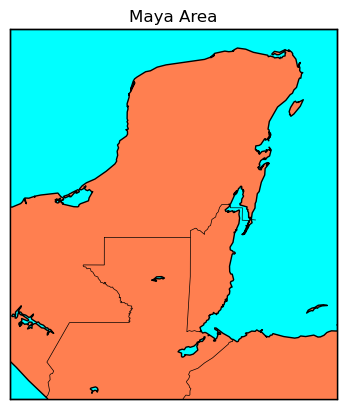

Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. 



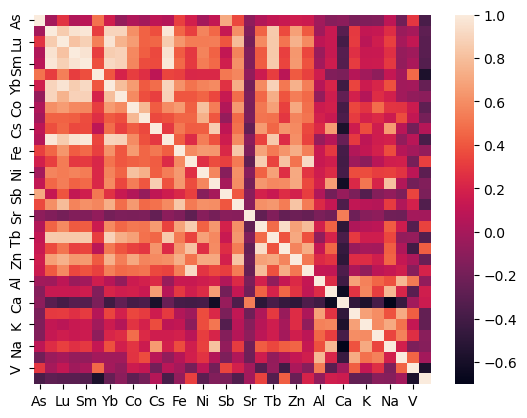

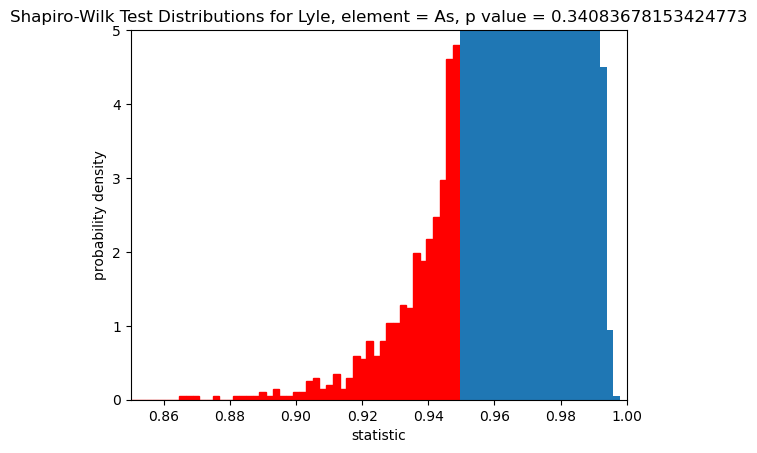

Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. 



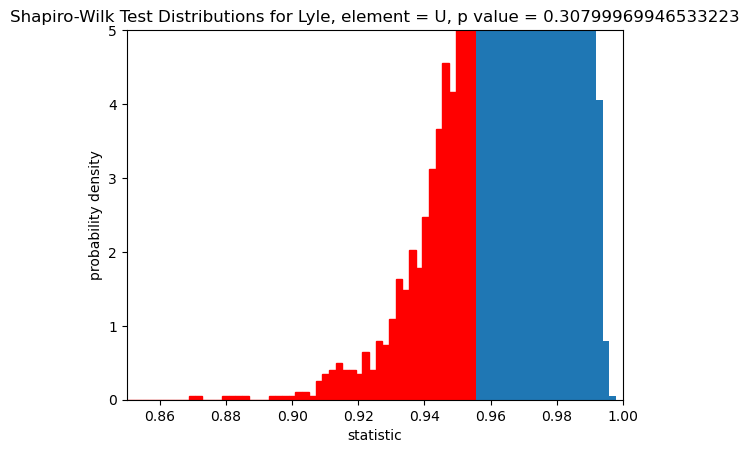

Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. 



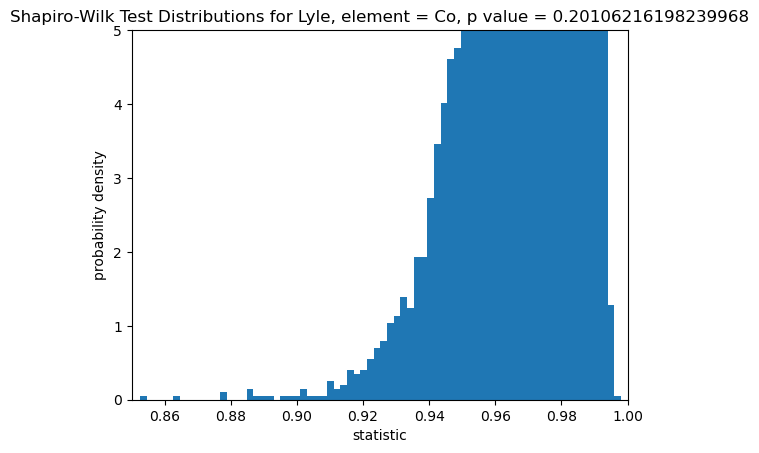

Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. 



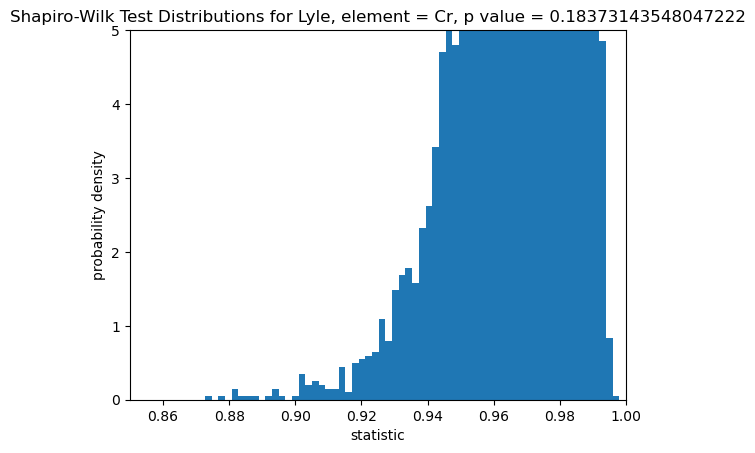

Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. 



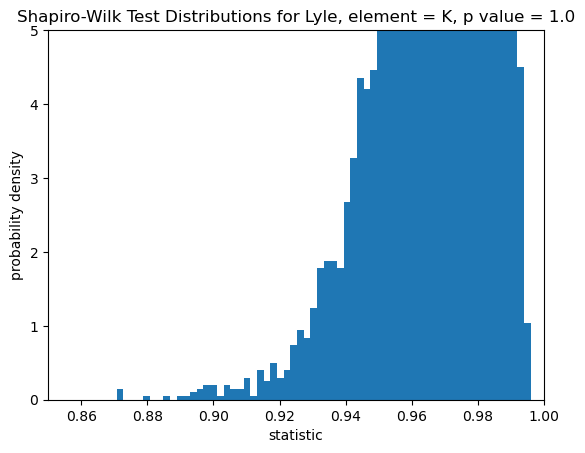

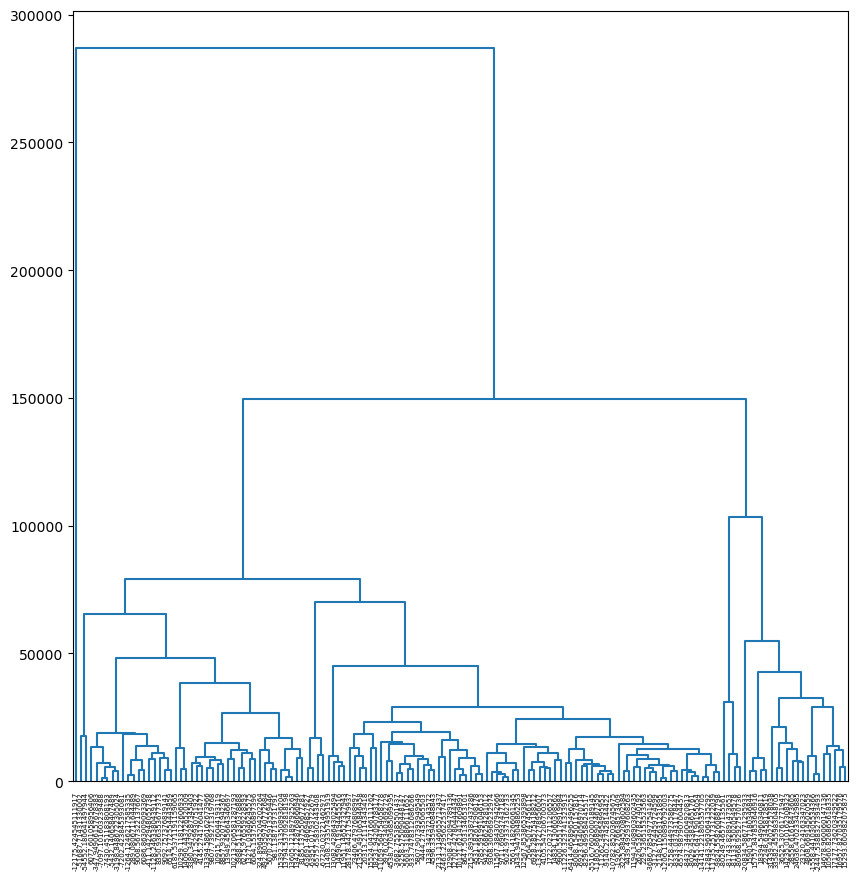

In [10]:
m = Basemap(projection='merc',llcrnrlat=14.5,urcrnrlat=22,\
            llcrnrlon=-93,urcrnrlon=-86,lat_ts=20,resolution='i')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua') 
plt.title("Maya Area")
plt.show()

correlation = np.corrcoef(X_df, yt_map, rowvar=False)
correlation_df = pd.DataFrame(correlation, index = df_train.columns, columns = df_train.columns)

#Ca has good correlation which is why it was very good as a classification attribute
sns.heatmap(correlation_df)

#testing whether element has normal distribution within respective sample
for i in labels:
    if i == 'Investigator':
        break
    col_bishop = bishop_X[i]
    col_lyle = lyle_X[i]
    
    shapiro_bishop = stats.shapiro(col_bishop)
    shapiro_lyle = stats.shapiro(col_lyle)

    
    
    bishop_test.setdefault(i, list(shapiro_bishop))
    lyle_test.setdefault(i, list(shapiro_lyle))
    
    mct_bishop = stats.monte_carlo_test(col_bishop, stats.norm.rvs, getstatistic, alternative='less')
    mct_lyle = stats.monte_carlo_test(col_lyle, stats.norm.rvs, getstatistic, alternative='less') 
    extremities_bishop = np.where(np.linspace(0.8, 1.0, 100) <= mct_bishop.statistic)[0]
    extremities_lyle = np.where(np.linspace(0.80, 1.0, 100) <= mct_lyle.statistic)[0]
    if(shapiro_bishop[1] > 0.05):
        print("Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. \n")
        fig, ax = plt.subplots()
        
        ax.hist(mct_bishop.null_distribution, density=True, bins = np.linspace(0.8, 1.0, 100))
        ax.set_title('Shapiro-Wilk Test Distributions for Bishop, element = ' + i + ", p value = " + str(shapiro_bishop[1]))
        ax.set_xlabel('statistic')
        ax.set_ylabel('probability density')
        #plt.legend('p-value (red) = ' + str(shapiro_bishop[1]
        
        for j in extremities_bishop:
            ax.patches[j].set_color('r')
            
        plt.xlim(0.90, 1.0)
        plt.ylim(0, 0.4)
        plt.show()
    if(shapiro_lyle[1] > 0.05):
        print("Only showing tests in which the p value was above 0.05, otherwise it is statistically insignificant. \n")
        fig2, ax2 = plt.subplots()
        ax2.hist(mct_lyle.null_distribution, density=True, bins = np.linspace(0.80, 1.0, 100))
        ax2.set_title('Shapiro-Wilk Test Distributions for Lyle, element = ' + i + ", p value = " + str(shapiro_lyle[1]))
        ax2.set_xlabel('statistic')
        ax2.set_ylabel('probability density')
        #plt.legend('p-value (red) = ' + str(shapiro_lyle[1]))
    
        #extremities_lyle = np.where(np.linspace(0.80, 1.0, 100) <= mct_lyle.statistic)[0]
        for p in extremities_bishop:
            ax2.patches[p].set_color('r')
        plt.xlim(0.85, 1.0)
        plt.ylim(0, 5)
        plt.show()

pca = PCA(n_components=2).fit_transform(X_df)
pca = pd.DataFrame(pca)

model = KMeans(n_clusters = 3)
model.fit(X_df)
clusters = model.labels_
centroids = model.cluster_centers_
sse = model.inertia_
sse_dict = {}
ratio = {}

dist = linkage(X_df, method ='average', metric = 'euclidean')

plt.figure(figsize=(10, 10))
dendrogram(dist, color_threshold=4)
y = pca[1]
ax = plt.gca()
labels = [y[int(t.get_text())] for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.xticks(rotation = 90)
plt.show()

# experiment with algorithms, feature sets, parameters, etc.,

In [12]:
print("For the decision tree data I tested combinations from 2-12 of ['As', 'La', 'Lu', 'Nd', 'Sm', 'U', 'Yb', 'Ce', 'Ni', 'Cr', 'Cs', 'Fe', 'K'], vars that",
     "I found through trial and error to be good. The top ones got over 98% accuracy and similar recall and precision. I did not do any dimension reduction for",
     "the decision tree since it isn't necessary, although it may have improved my results somewhat. If one combination of attributes worked well",
     "without any pruning as well as with pruning then I would use the pruned tree with the test data to reduce overfitting. That's why I tested",
     "every attribute combination with multiple ccp_alpha values. \n")
print("Decision tree acc >= 98% \n")

#X_columns = [['As', 'U', 'K'], ['U', 'Ni', 'K'], ['U', 'K']] #- works well ~98%
#X_columns = df_train[['U', 'K']] #- ~98%
#X_columns = df_train[['As', 'U', 'K', 'Ni']]
X_columns = df_train[['As', 'La', 'Lu', 'Nd', 'Sm', 'U', 'Yb', 'Ce', 'Ni', 'Cr', 'Cs', 'Fe', 'K']]
#X_columns = list(X_df.columns)

#pca = make_pipeline(StandardScaler(), PCA(n_components=2))
#nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

#reductions = [("PCA", pca), ("NCA", nca)]

accs_DTC = []
pres_DTC = []
recs_DTC = []
class_labels_DTC = []
X_vars_DTC = []
#scores_DTC = []
accs_mean_DTC = []
pres_mean_DTC = []
recs_mean_DTC = []
#scores_mean_DTC = []
predictions_DTC = []
criterion_DTC = []
ccp_alpha_DTC = []

correlation = np.corrcoef(X_df, yt_map, rowvar=False)
correlation_df = pd.DataFrame(correlation, index = df_train.columns, columns = df_train.columns)

for p in range(2,4):
    combs = list(combinations(X_columns, p))
    #combs = X_columns
    for i in combs:
        i = list(i)
        X = df_train[i]
        X = np.asarray(X)
        for c in ['entropy']: #tried gini was slightly worse than entropy
            for j in range (0,11):
                j_sub = j / 100
                #plt.figure()
                dtc = DecisionTreeClassifier(criterion = c, ccp_alpha= j_sub)
                criterion_DTC.append(c)
                ccp_alpha_DTC.append(j_sub)
                dtc.fit(X, yt_map)
                yp_DTC = cross_val_predict(dtc, X, yt_map, cv = 5)
                '''
                print_tree(dtc, i, j_sub)
                
                cm = ConfusionMatrixDisplay.from_predictions(yt_map, yp_DTC)
                plt.show()
                '''
                class_labels_DTC = dtc.classes_
                X_vars_DTC.append(i)
                accs_DTC.append(accuracy_score(yt_map, yp_DTC))
                pres_DTC.append(precision_score(yt_map, yp_DTC, average='macro'))
                recs_DTC.append(recall_score(yt_map, yp_DTC, average='macro'))
                #print("criterion = " + i + ", ccp_alpha = " + str(j_sub))
                #print('acc = %.3f, pre = %.3f, rec = %.3f' % (acc, pre, rec))
                #plot_tree(model, filled=True)
                #plt.show()

results_DTC = pd.DataFrame()
results_DTC['Train_Vars'] = X_vars_DTC
#results_DTC["Class_labels"] = class_labels_DTC
results_DTC["Accuracy"] = accs_DTC
results_DTC["Precision"] = pres_DTC
results_DTC["Recall"] = recs_DTC
results_DTC['Criterion'] = criterion_DTC
results_DTC['CCP_Alpha'] = ccp_alpha_DTC

above_97_DTC = results_DTC['Accuracy'] >= 0.98

above_97_DTC = results_DTC.loc[above_97_DTC]

print(above_97_DTC)
print("\n")

print("KNN Classifier \n")

#Early Best: [V, Ca], [Th,Zn], [Sc,V], [Cr,v], [U,Th], [U,Hf](for all knn)
#new best: ['Zn', 'Th', 'U'], ['Sc', 'Th', 'U'], ['Ca', 'Zn', 'Th'],
#['Ca', 'Zn', 'V', 'Th', 'U'], 	['Ca', 'Sc', 'Th', 'U', 'Hf'],
#2(3)-['Sc', 'Cr', 'Th']{20}, 1-['Cr', 'Th', 'U']{26}, 2(3)-['Ca', 'Th', 'U']{20}

#X = df_train[['Ca','Zn','Sc','V','Cr','Th','U', 'Hf']]
#takes most frequent classes from early tests and tests all combs of 3
#X = df_train[['Sc', 'Zn', 'Ca', 'Cr', 'V', 'Th', 'U']]

#X = [['Cr', 'Th', 'U'], ['Sc', 'Cr', 'Th'], ['Ca', 'Th', 'U']]

#found that ['Ca', 'Th', 'U'] is almost perfect after testing above
#~99 accuracy, p, and r with manhattan metric

#['U', 'V', 'Th', 'Ni'], and ['U', 'Ca', 'Th', 'Ni'] with NCA and manhattan work well
X = df_train[['As', 'U', 'Cr', 'Eu', 'Ni', 'Sc', 'Th', 'Al', 'Ti']]

'''Start of commented out loop to determine best params for each size attribute set'''

#results_KNN_best = pd.DataFrame()
#r = 24
#for r in range(24,1, -1):

    #X = df_train[['As','U','V', 'Cr', 'Ca', 'Th', 'Al', 'Eu', 'Fe', 'Ni']]
    #X = list(X_df.columns)
    #X = df_train[X_new]
    
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))
    
reductions = [("PCA", pca), ("NCA", nca)]
metrics = ['manhattan']
    
accs = []
pres = [] 
recs = []
knns = []
class_labels = []
algorithms = []
X_vars = []
reduction_methods = []
metrics_list = []
scores = []
accs_mean = []
pres_mean = []
recs_mean = []
scores_mean = []
predictions_knn = []
'''
pca0 = np.asarray(pca[0])
pca1 = np.asarray(pca[1])
pca0 = np.reshape(pca0, (-1,1))
pca1 = np.reshape(pca1, (-1,1))
'''
for p in range(9,10): # replaced with r when looping to find best params
    combs = list(combinations(X, p))
    #combs = X
    for i in combs:
        i = list(i)
        Xt = df_train[i]
    
        Xt = np.asarray(Xt)
        for n in range(2, 7):
            for met in metrics:
                '''
                    model = KMeans(n_clusters = n, algorithm='lloyd')
                    acc = accuracy_score(yt_map, yp)
                    rec = recall_score(yt_map, yp, average = 'macro')
                    pre = precision_score(yt_map, yp, average = 'macro')
                    '''
                    
                knn =  KNeighborsClassifier(n_neighbors=n, n_jobs=-1, algorithm = 'auto', metric = met)
                    
                for m, (name, model) in enumerate(reductions):
                    for v in range(100): #run for avg n times
                        X_train,X_test, y_train, y_test = train_test_split(Xt, yt_map, test_size=0.3, stratify=yt_map) 
                        model.fit(X_train, y_train)
                            
                        knn.fit(model.transform(X_train), y_train)
                            
                        yp = knn.predict(model.transform(X_test))
                            
                        acc_knn = knn.score(model.transform(X_test), y_test)
                            
                        X_embed = model.transform(Xt)
                            
                        accs_mean.append(accuracy_score(y_test, yp))
                        pres_mean.append(precision_score(y_test, yp, average='macro'))
                        recs_mean.append(recall_score(y_test, yp, average = 'macro'))
                        scores_mean.append(acc_knn)
        
                    class_labels.append(knn.classes_)
                    algorithms.append(knn.algorithm)
                    metrics_list.append(knn.effective_metric_)
                    knns.append(n)
                    X_vars.append(i)
                    score_mean = np.mean(scores_mean)
                    scores.append(score_mean)
                    reduction_methods.append(name)
                    accs.append(np.mean(accs_mean))
                    pres.append(np.mean(pres_mean))
                    recs.append(np.mean(recs_mean))
                      
                    scores_mean.clear()
                    pres_mean.clear()
                    recs_mean.clear()
                    accs_mean.clear()
                    '''  
                    plt.figure()
                    DecisionBoundaryDisplay.from_estimator(knn, X_embed, response_method='predict')
                    plt.scatter(X_embed[:,0], X_embed[:,1], c=yt_map, cmap='rainbow')
                    plt.title("KNN = " + str(n) + ": Test Mean Accuracy = " + str(score_mean))
                    plt.xlabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + ", " + i[3] + ", " + i[4] + ", " + i[5] + ", " + i[6] + ", " + i[7] + ", " + i[8] + "]" + "[0]")
                    plt.ylabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + ", " + i[3] + ", " + i[4] + ", " + i[5] + ", " + i[6] + ", " + i[7] + ", " + i[8] + "]" + "[1]")
                       
                    cm = ConfusionMatrixDisplay.from_estimator(knn, model.transform(X_test), y_test)
                    plt.plot()
                    '''
                    
results_KNN = pd.DataFrame()
results_KNN["Train_vars"] = X_vars
results_KNN['KNN'] = knns
results_KNN['Mean_Acc'] = scores
results_KNN["Reduction"] = reduction_methods
results_KNN["Accuracy"] = accs
results_KNN["Precision"] = pres
results_KNN["Recall"] = recs
results_KNN["Class_labels"] = class_labels
results_KNN["Algorithm"] = algorithms
results_KNN["Metric"] = metrics_list

    #best_index = scores.index(np.max(scores))
    
    #best = results_KNN.iloc[best_index]
    
    #results_KNN_best[r] = best
    #X_new = results_KNN_best.at["Train_vars", r]

#results_KNN_best = results_KNN_best.T

#results_KNN_best.to_csv("KNN_Best.csv", index_label="# of Attributes")

'''End of loop to determine best attribute set for each n number of attributes: send KNN_best to csv'''

KNN_best_params = pd.read_csv("KNN_Best.csv")
KNN_best_params = KNN_best_params.drop(columns="Class_labels")
print("For this I looped my KNN classifier using the combination of 32 of the 33 atributes to find the best reduction of 32 attributes based on the mean accuracy.",
      "Then I put those parameters into the classifier looking for the best combonation of reduced 31 attributes, and so on, until the classifier got down to two attributes.",
      "By doing this I was able to find an algorithm that works well in a reasonable amount of time, instead of trying all combonations, which would probably take years.",
      "I'm surprised that it worked as well as it did, I was able to find a reduction with 100% accuracy. I have the code for this loop commented out so I don't have to run it again outside of the spider IDE.",
      "I ended finding that the ones with 9 & 8, and 7 attributes worked really well.\n")
      
print(KNN_best_params)
print("\n")
print("SVM classifier \n")

print("For the SVC I did a similar thing as the KNN classifier however instead of testing the best combinations for each attribute number, I tested smaller combinations",
     "of variables that worked well in the KNN classifier. By messing with the parameters it wasn't long before I got a model that could predict the correct class with 100% accuracy, precision, and recall.\n")

X_columns = df_train[['Ca','Th','U']]

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

reductions = [("PCA", pca), ("NCA", nca)]

SVC_c = [1.0]
SVC_kernel = ['linear', 'poly'] #sigmoid and rbf don't work well
SVC_degree = [3, 4, 5]
SVC_gamma = ['scale']
SVC_coef = [0.0]
SVC_tol = [0.01, 0.001, 0.1]

SVC_c_list = []
SVC_kernel_list = []
SVC_degree_list = []
SVC_gamma_list = []
SVC_coef_list = []
SVC_tol_list = []

accs_SVC = []
pres_SVC = []
recs_SVC = []
scores_SVC = []
SVC_class_labels = []
for p in range(3,4):
    combs = list(combinations(X_columns, p))
    #combs = X
    for i in combs:
        i = list(i)
        X = df_train[i]
        X = np.asarray(X)
        for c in SVC_c:
            for j in SVC_kernel:
                for d in SVC_degree:
                    for g in SVC_gamma:
                        for co in SVC_coef:
                            for t in SVC_tol:
                                
                                svc = SVC(cache_size=1000, C=c, kernel=j, degree=d,
                                          gamma= g, coef0=co, tol=t)
                                
                                for m, (name, model) in enumerate(reductions):
                            
                                    model.fit(X, yt_map)
                                        
                                    #svc.fit(model.transform(X), yt_map)
                                        
                                    yp_SVC = cross_val_predict(svc, model.transform(X), yt_map)
                                        
                                    #acc_svc = svc.score(model.transform(X), y_test)
                                        
                                    X_embed = model.transform(X)
                                    acc = accuracy_score(yt_map, yp_SVC)
                                    
                                    SVC_class_labels.append(i)
                                    SVC_c_list.append(c)
                                    SVC_kernel_list.append(j)
                                    SVC_degree_list.append(d)
                                    SVC_gamma_list.append(g)
                                    SVC_coef_list.append(co)
                                    SVC_tol_list.append(t)
                                    accs_SVC.append(acc)
                                    pres_SVC.append(precision_score(yt_map, yp_SVC, average='macro'))
                                    recs_SVC.append(recall_score(yt_map, yp_SVC, average = 'macro'))
                                    #scores_SVC.append(acc_svc)
                                    '''
                                    plt.figure()
                                    svc.fit(model.transform(X), yt_map)
                                    DecisionBoundaryDisplay.from_estimator(svc, X_embed, response_method='predict')
                                    plt.scatter(X_embed[:,0], X_embed[:,1], c=yt_map, cmap='rainbow')
                                    plt.title('SVC - degree = %d, kernel = %s, c = %.2f, tol = %.3f, acc = %.4f' % (d, j, c, t, acc ))
                                    plt.xlabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + "]" + "[0]")
                                    plt.ylabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + "]" + "[1]")
                                   
                                    cm = ConfusionMatrixDisplay.from_predictions(yt_map, yp_SVC)
                                    
                                    plt.show()
                                    '''
                                    
results_SVC = pd.DataFrame()
#results_DTC['Train_Vars'] = X_vars_DTC
results_SVC["Class_labels"] = SVC_class_labels
results_SVC["Accuracy"] = accs_SVC
results_SVC["Precision"] = pres_SVC
results_SVC["Recall"] = recs_SVC
results_SVC['C'] = SVC_c_list
results_SVC['Kernel'] = SVC_kernel_list
results_SVC['Degree'] = SVC_degree_list
results_SVC['Gamma'] = SVC_gamma_list
results_SVC['Coef'] = SVC_coef_list
results_SVC['Tolerance'] = SVC_tol_list

print(results_SVC.head(10))

For the decision tree data I tested combinations from 2-12 of ['As', 'La', 'Lu', 'Nd', 'Sm', 'U', 'Yb', 'Ce', 'Ni', 'Cr', 'Cs', 'Fe', 'K'], vars that I found through trial and error to be good. The top ones got over 98% accuracy and similar recall and precision. I did not do any dimension reduction for the decision tree since it isn't necessary, although it may have improved my results somewhat. If one combination of attributes worked well without any pruning as well as with pruning then I would use the pruned tree with the test data to reduce overfitting. That's why I tested every attribute combination with multiple ccp_alpha values. 

Decision tree acc >= 98% 

      Train_Vars  Accuracy  Precision    Recall Criterion  CCP_Alpha
1342  [As, U, K]  0.986395   0.983088  0.983088   entropy       0.00
1343  [As, U, K]  0.986395   0.983088  0.983088   entropy       0.01
1344  [As, U, K]  0.986395   0.983088  0.983088   entropy       0.02
1345  [As, U, K]  0.986395   0.983088  0.983088   en

# visualize experimental results

Decision Tree Classifier Visualizations 



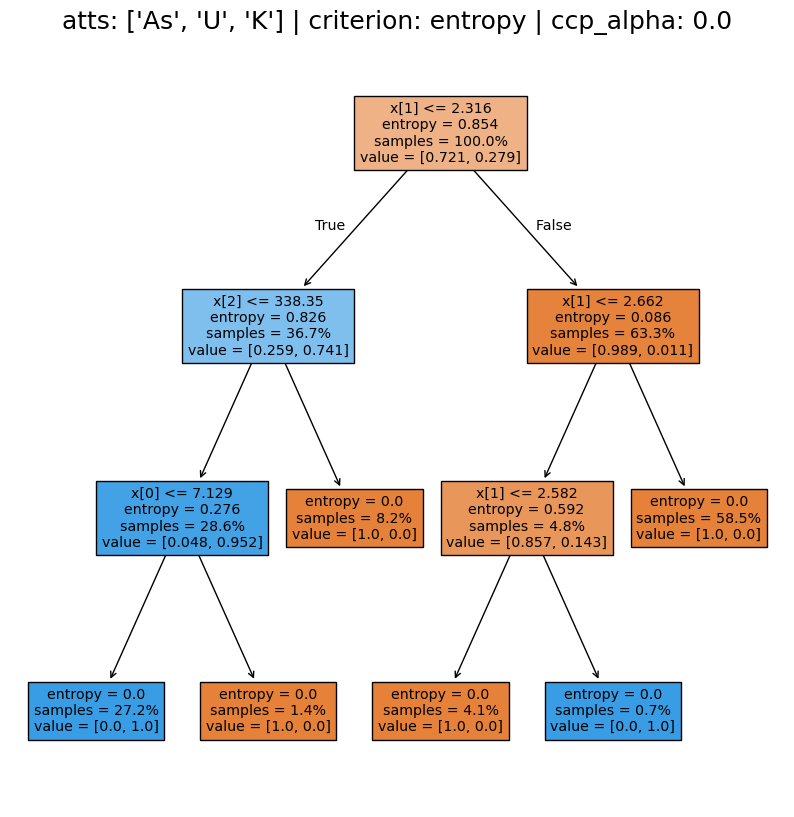

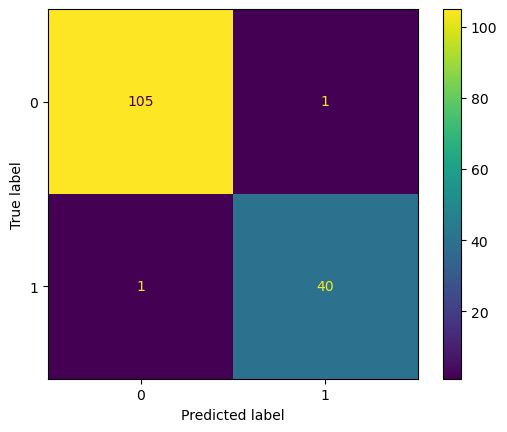

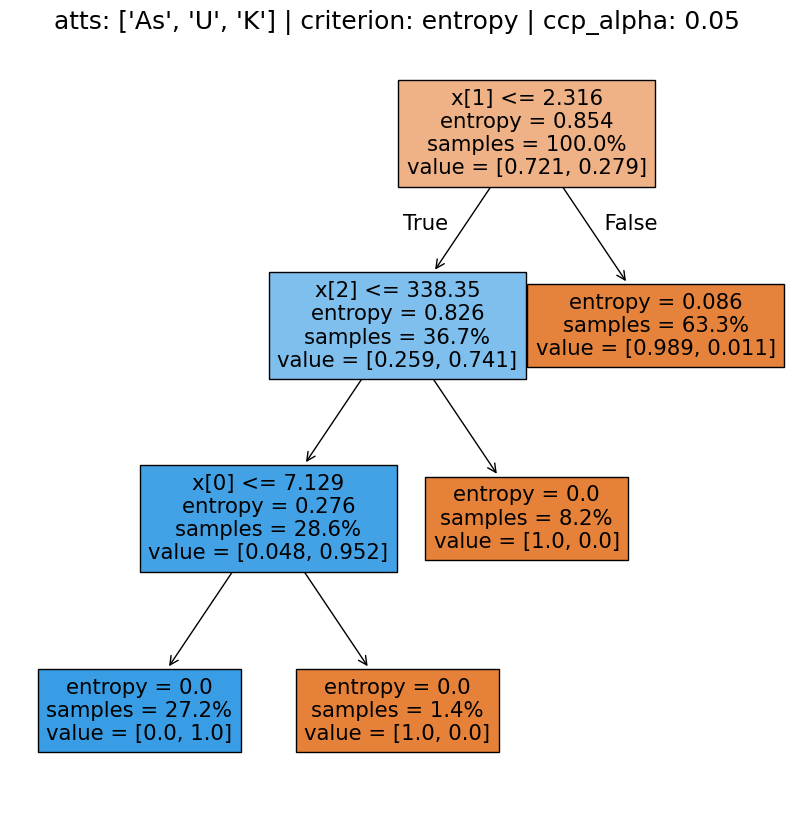

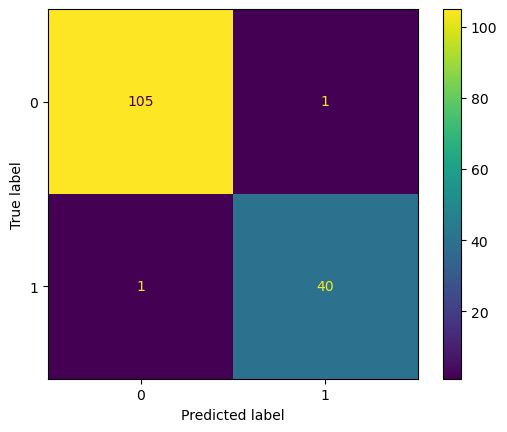

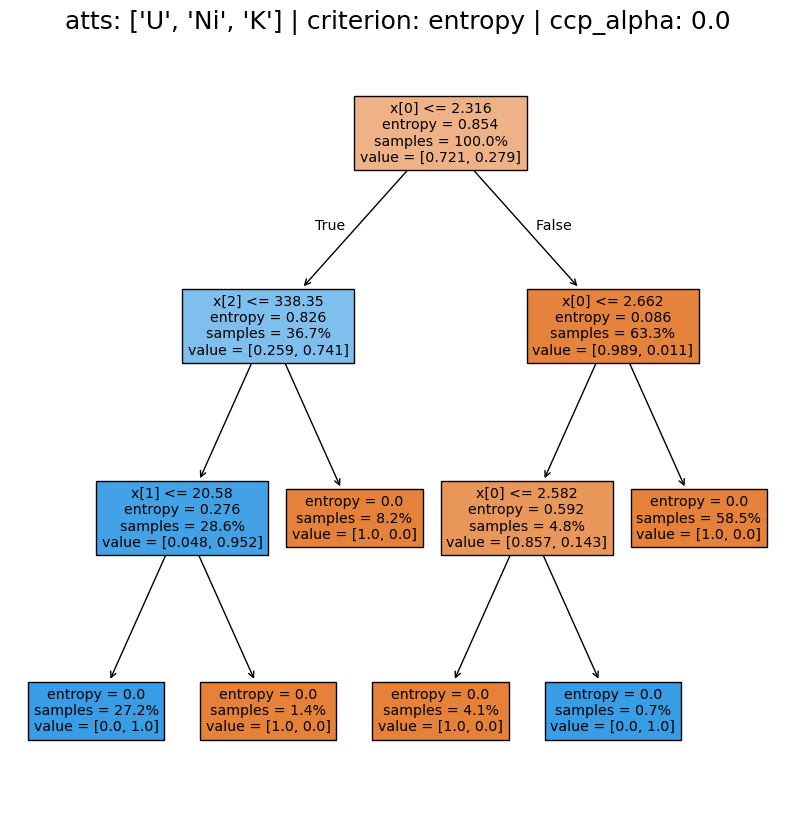

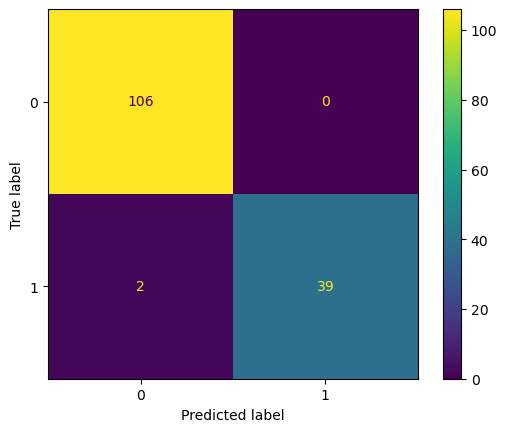

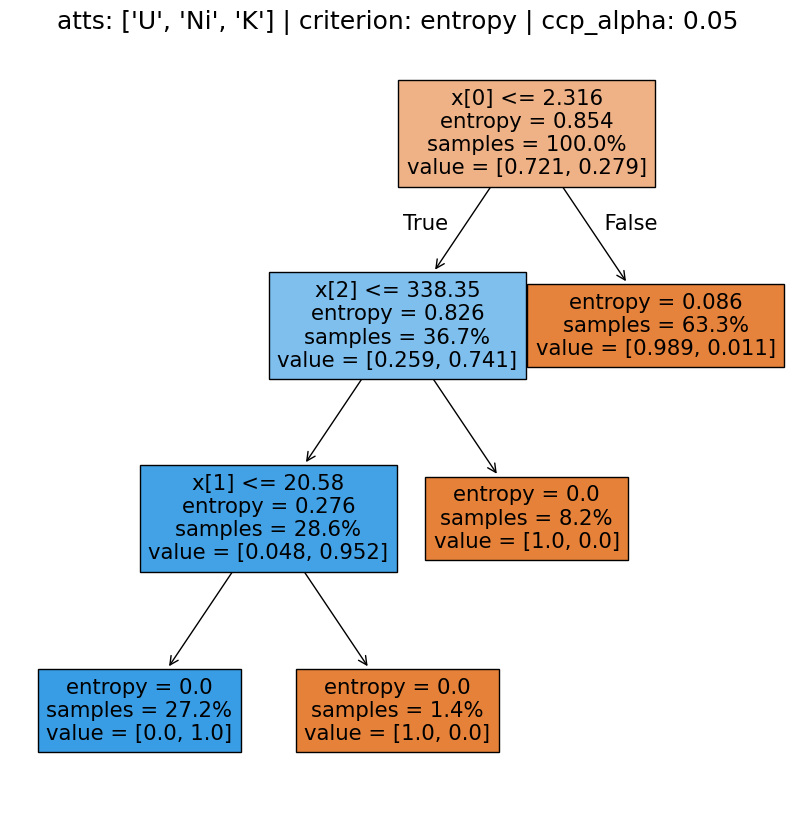

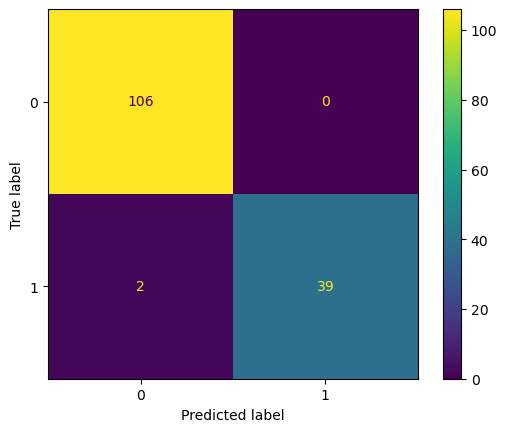

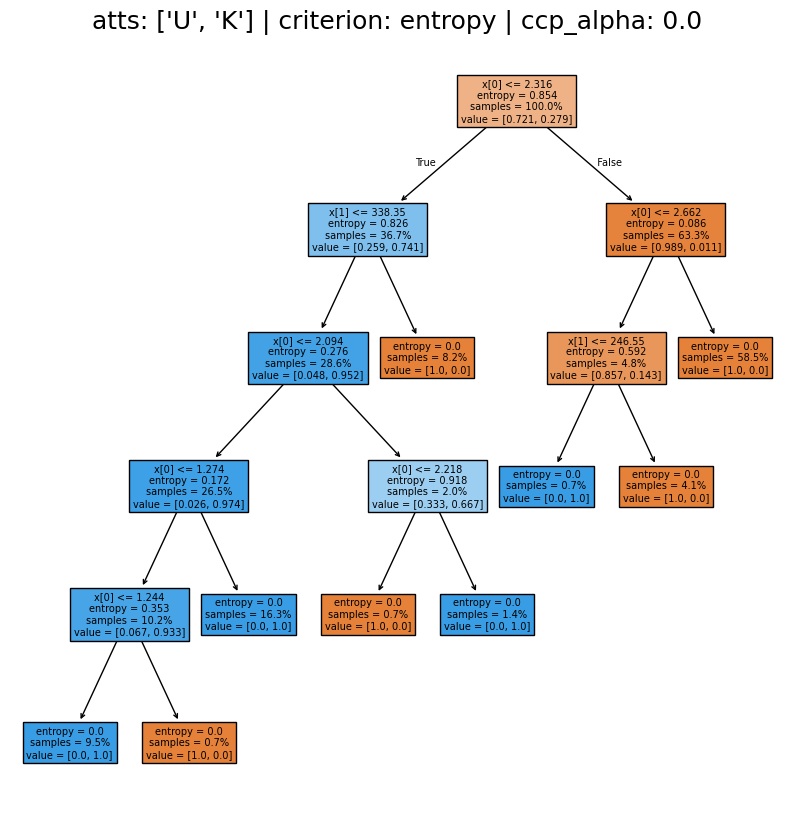

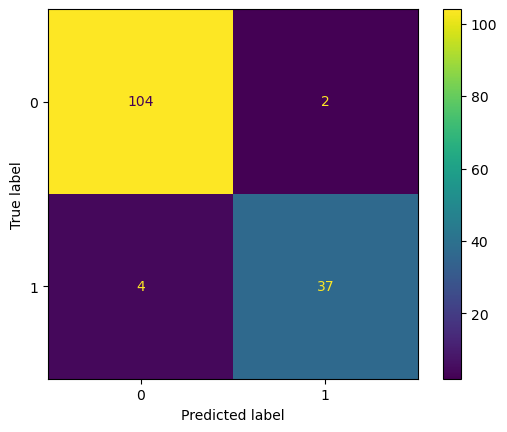

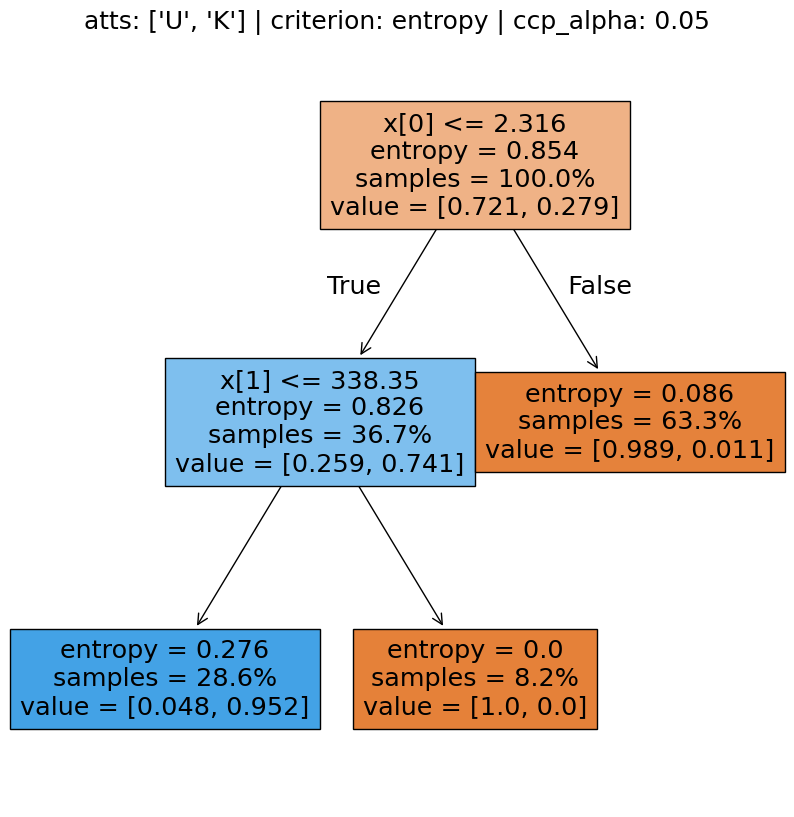

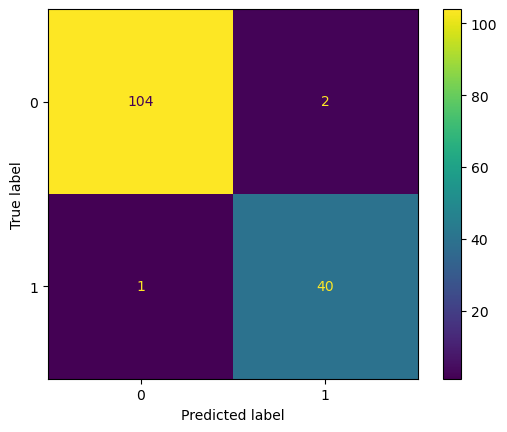

best knn params 



<Figure size 640x480 with 0 Axes>

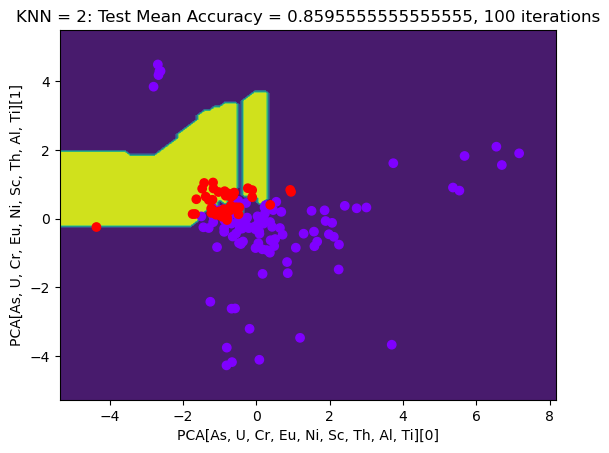

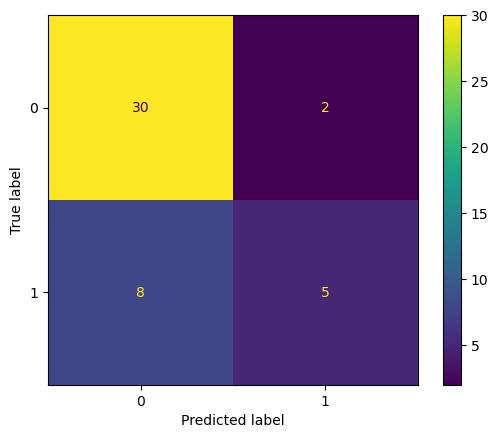

<Figure size 640x480 with 0 Axes>

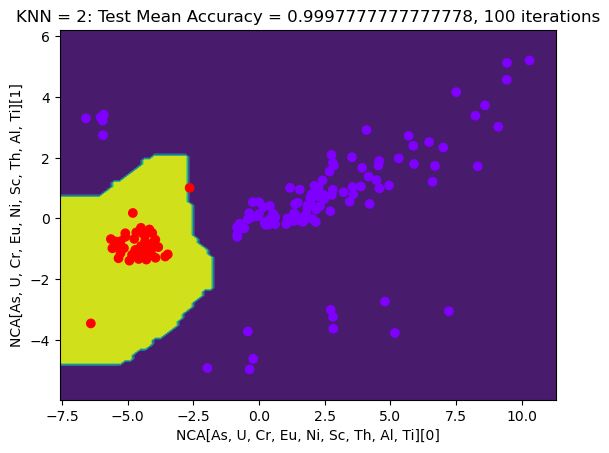

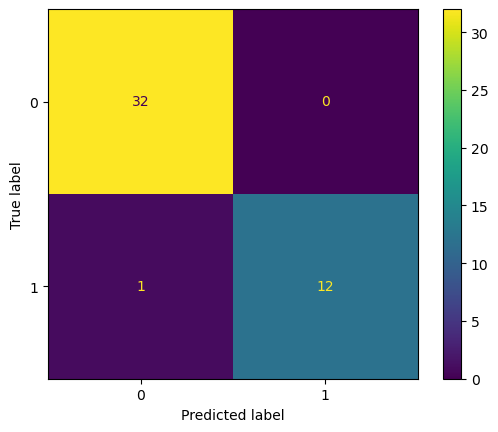

<Figure size 640x480 with 0 Axes>

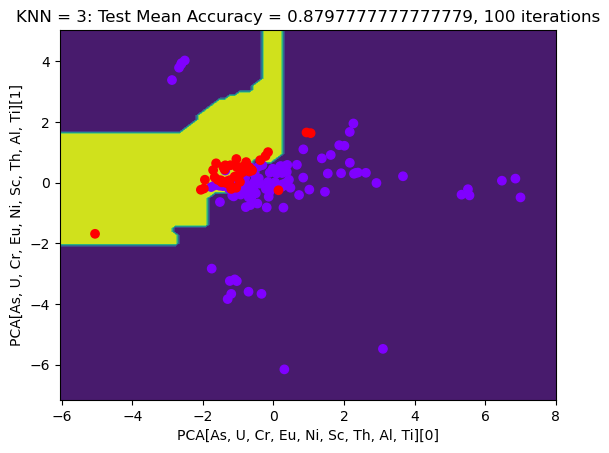

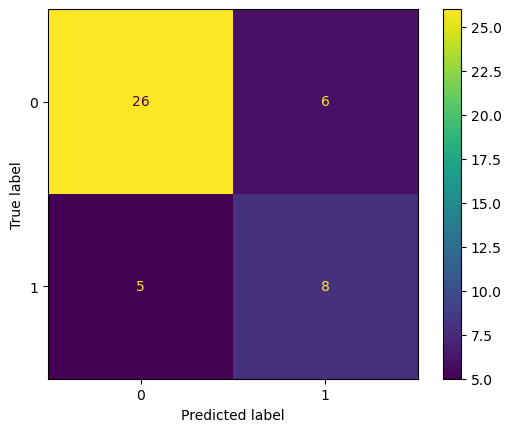

<Figure size 640x480 with 0 Axes>

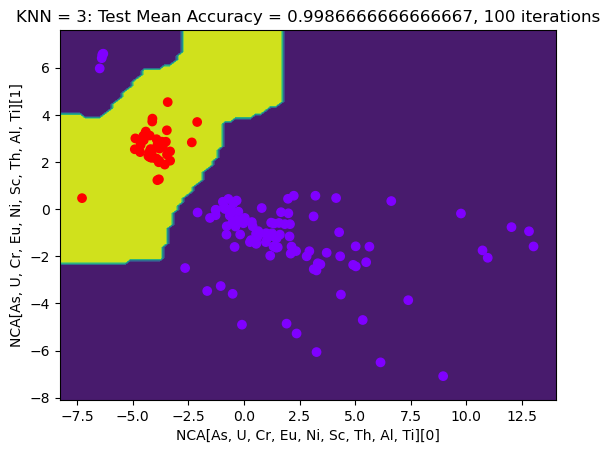

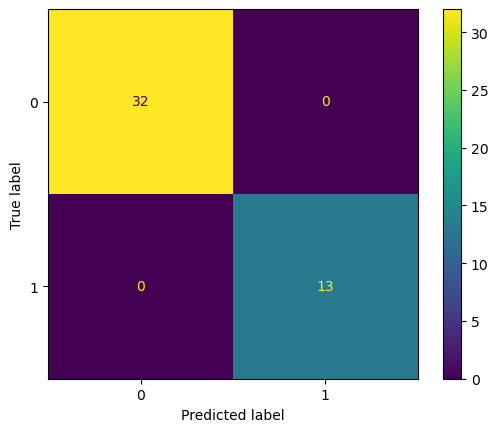

<Figure size 640x480 with 0 Axes>

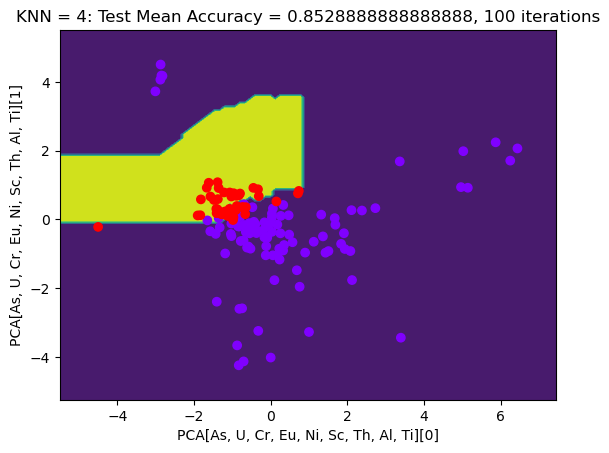

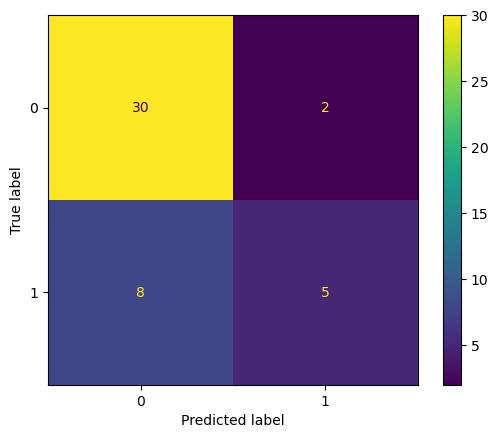

<Figure size 640x480 with 0 Axes>

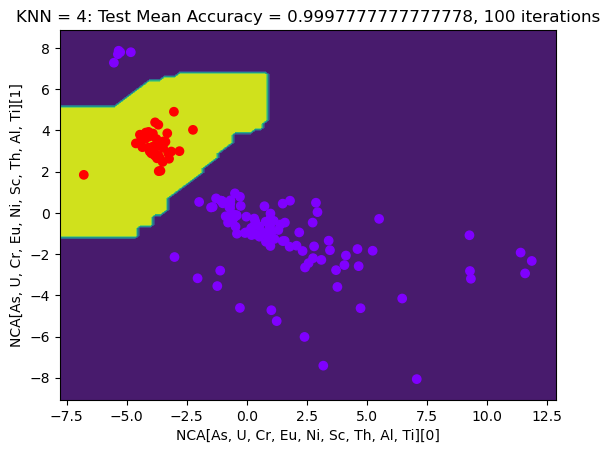

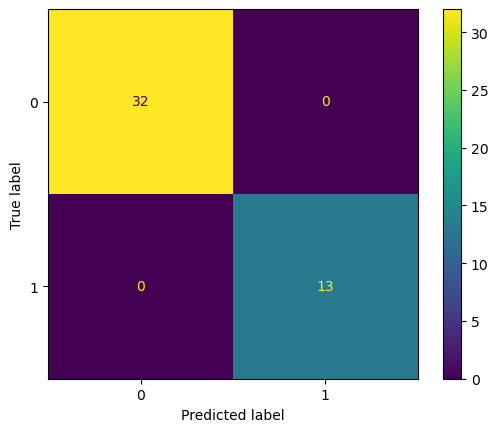

<Figure size 640x480 with 0 Axes>

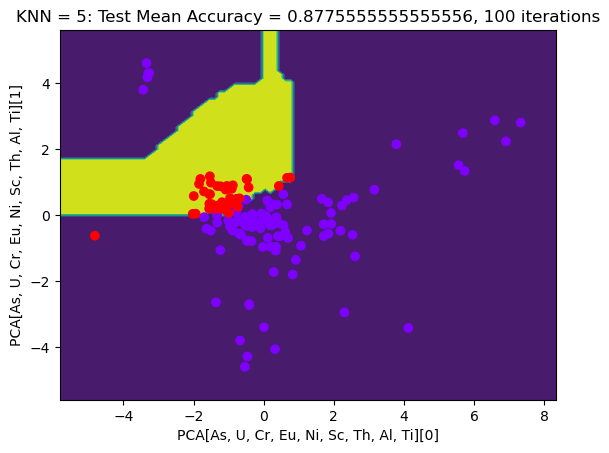

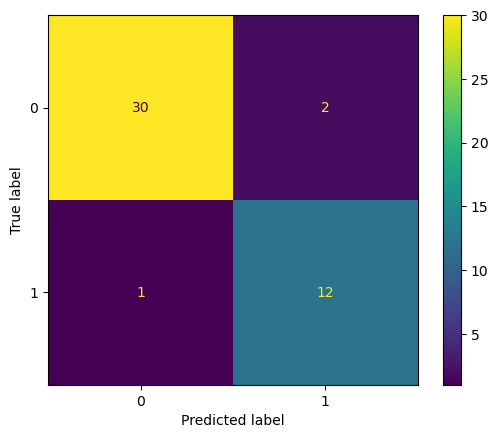

<Figure size 640x480 with 0 Axes>

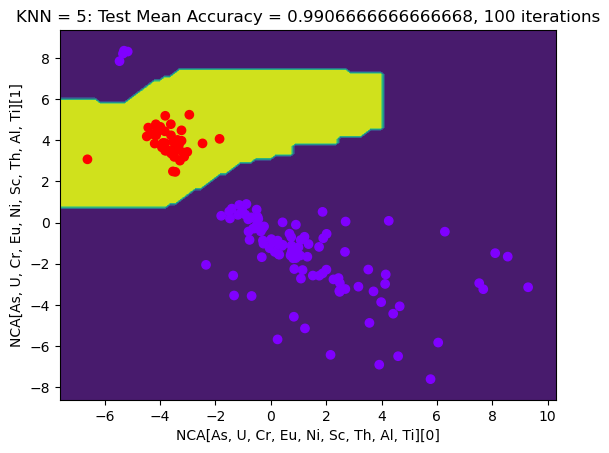

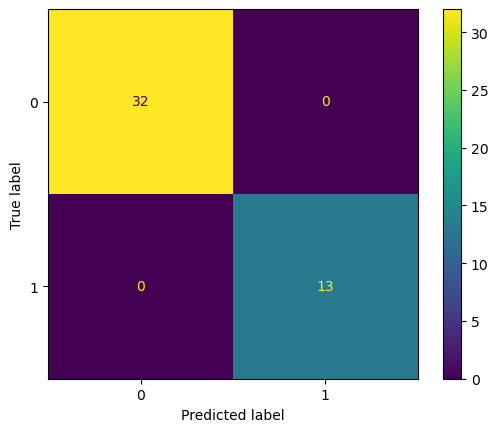

<Figure size 640x480 with 0 Axes>

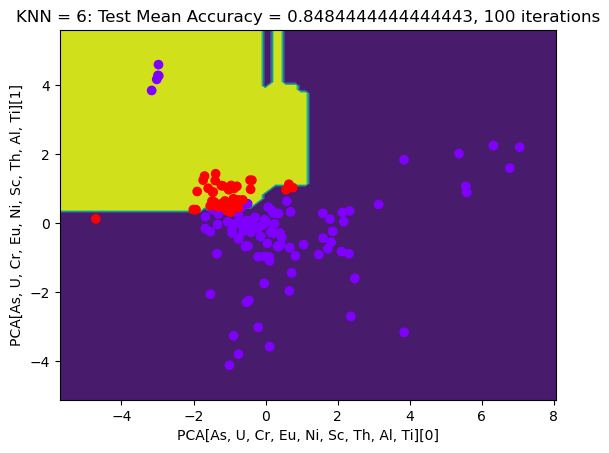

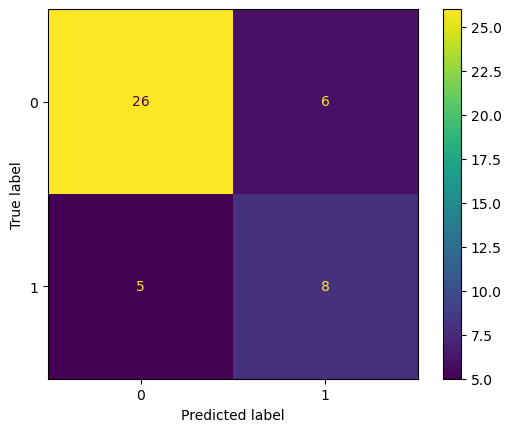

<Figure size 640x480 with 0 Axes>

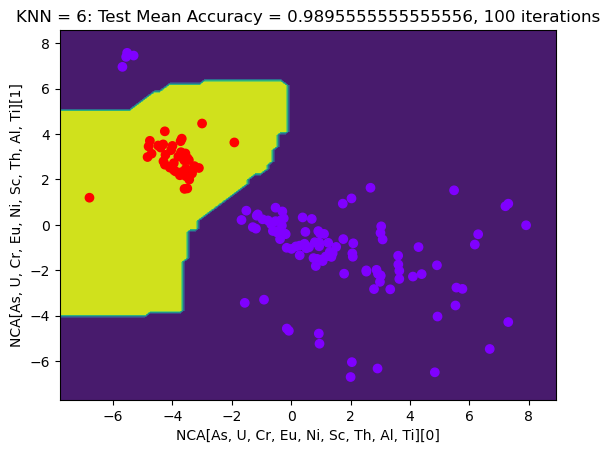

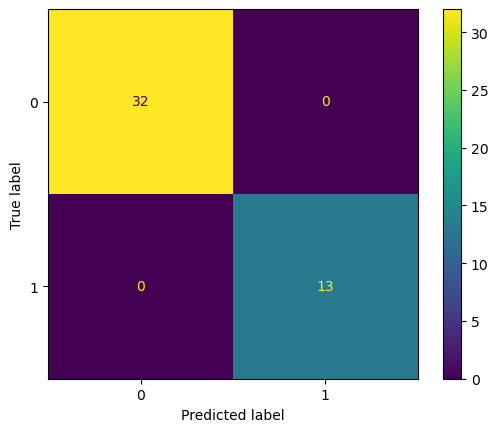

SVC Viz 



<Figure size 640x480 with 0 Axes>

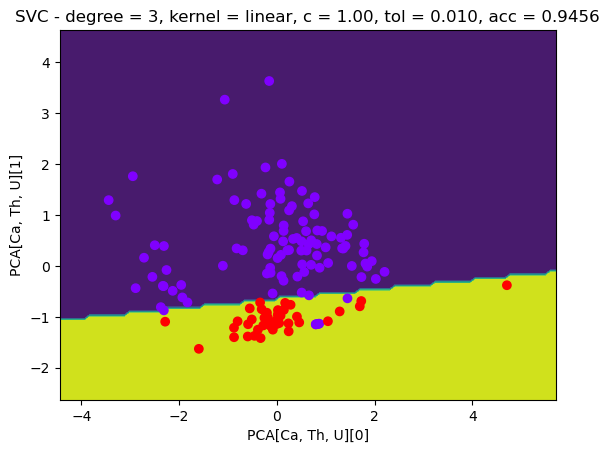

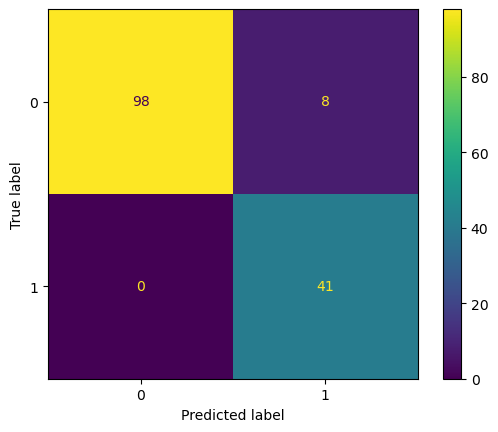

<Figure size 640x480 with 0 Axes>

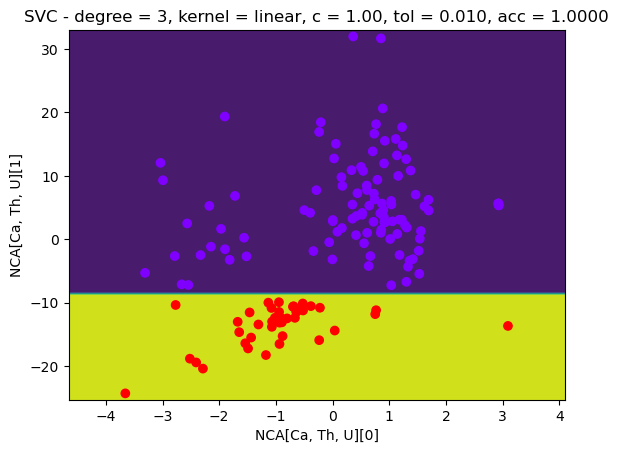

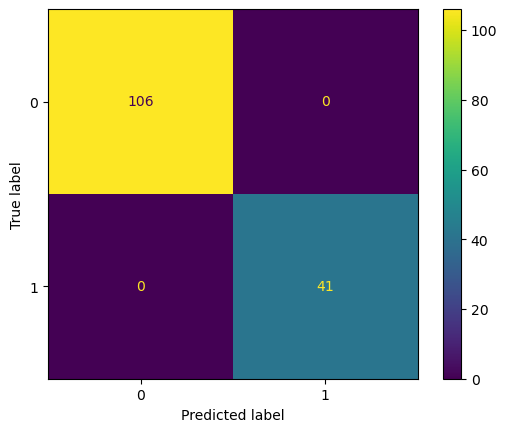

<Figure size 640x480 with 0 Axes>

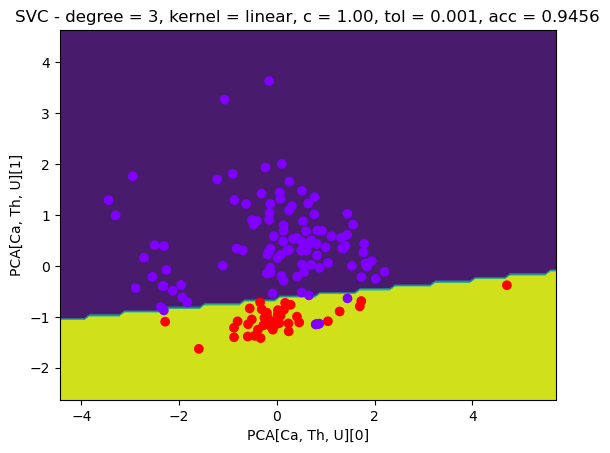

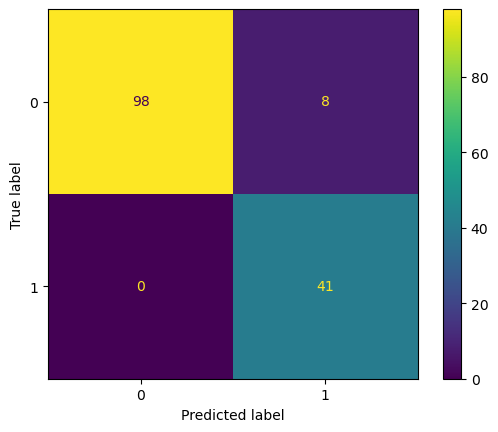

<Figure size 640x480 with 0 Axes>

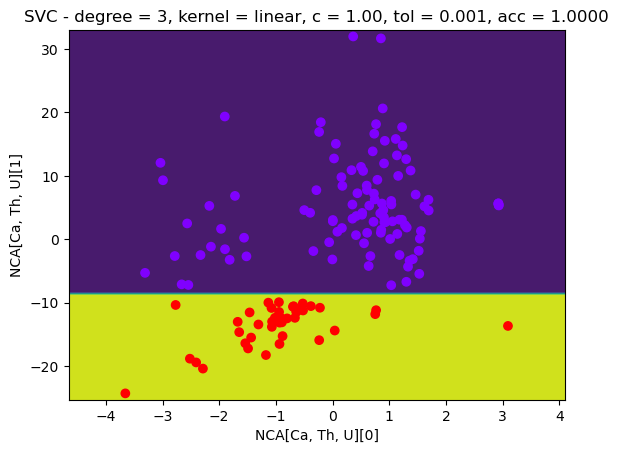

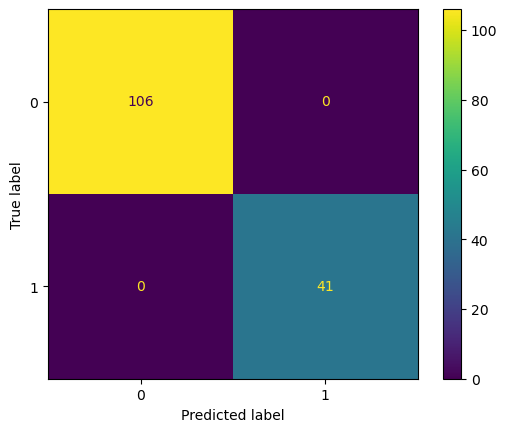

<Figure size 640x480 with 0 Axes>

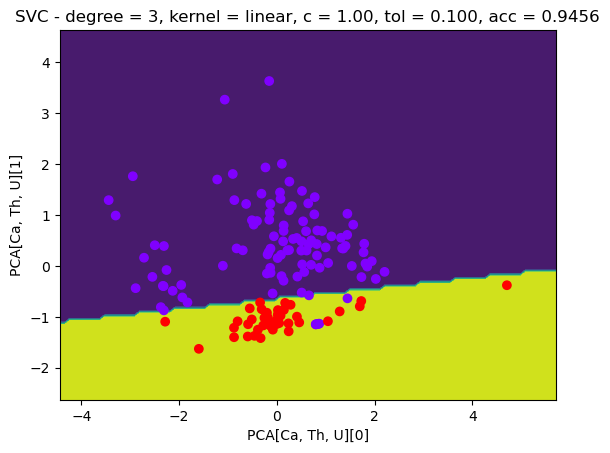

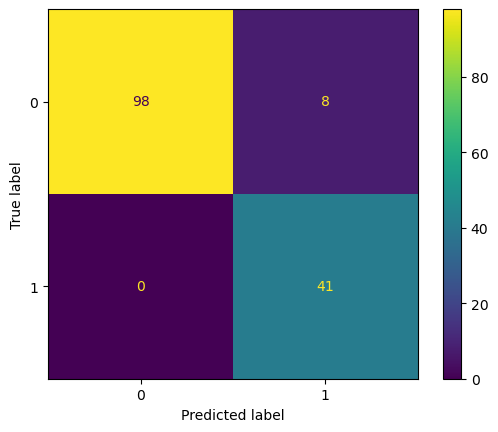

<Figure size 640x480 with 0 Axes>

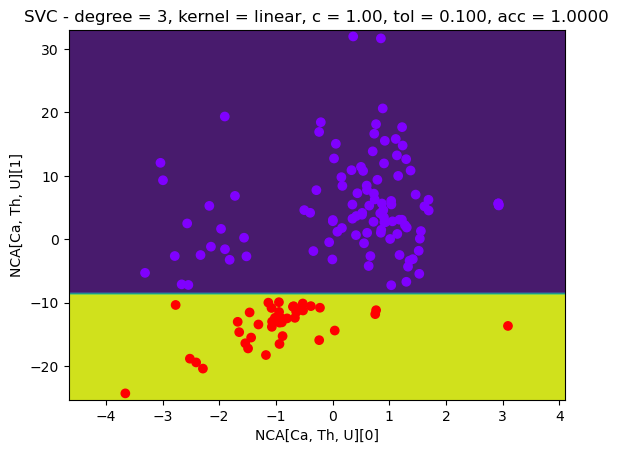

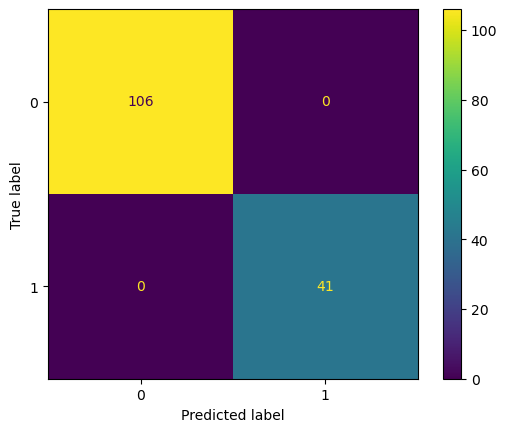

<Figure size 640x480 with 0 Axes>

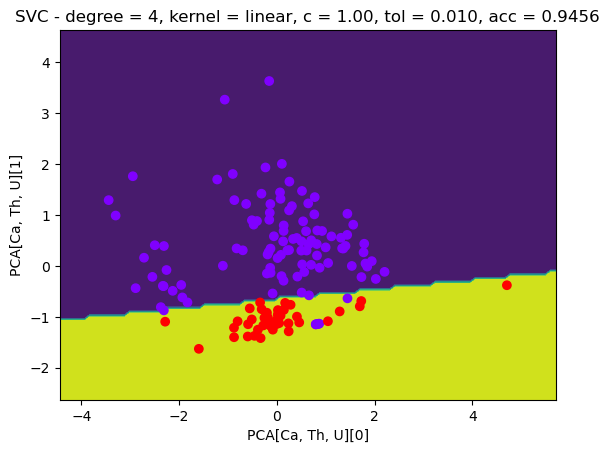

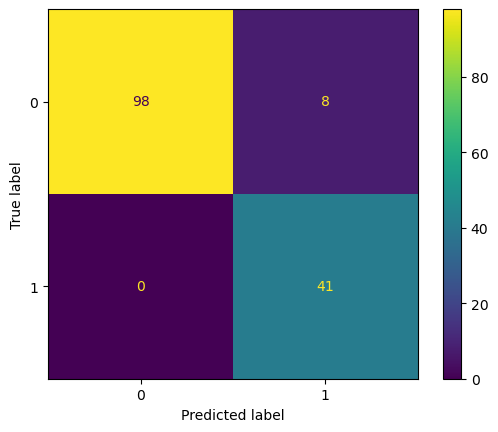

<Figure size 640x480 with 0 Axes>

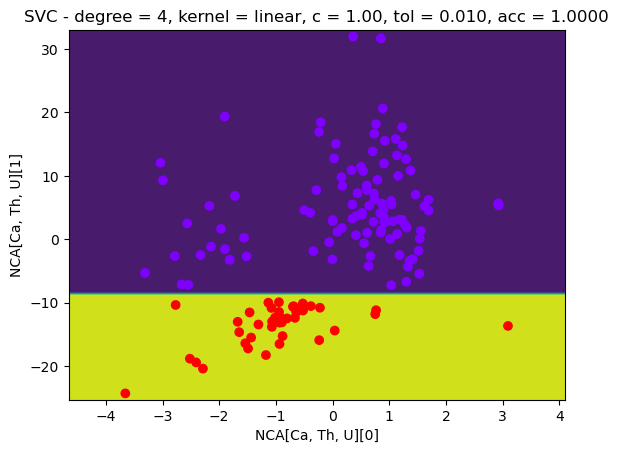

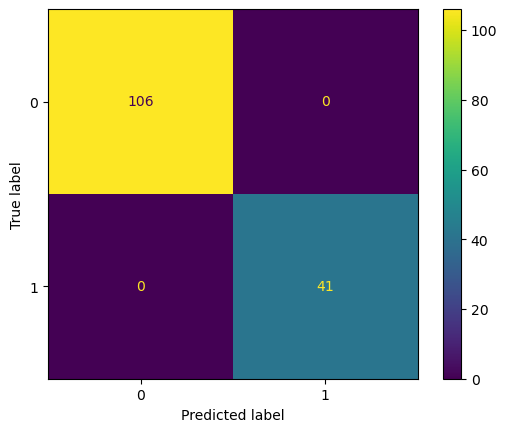

<Figure size 640x480 with 0 Axes>

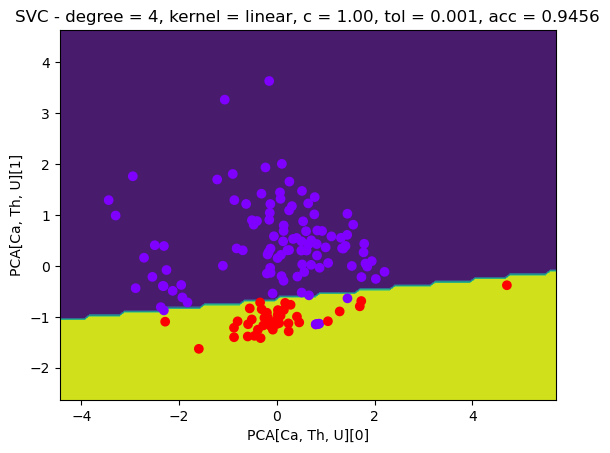

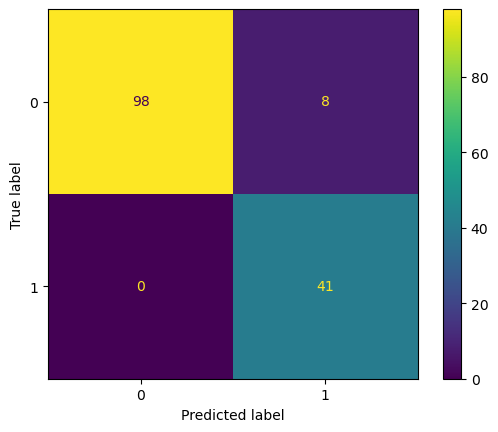

<Figure size 640x480 with 0 Axes>

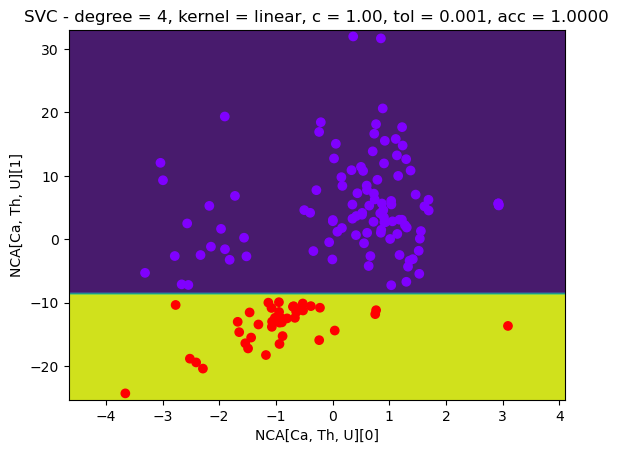

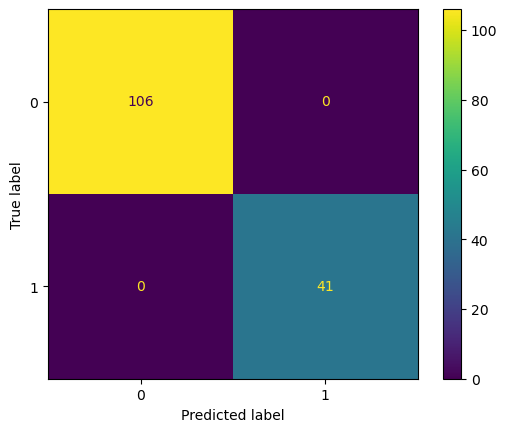

<Figure size 640x480 with 0 Axes>

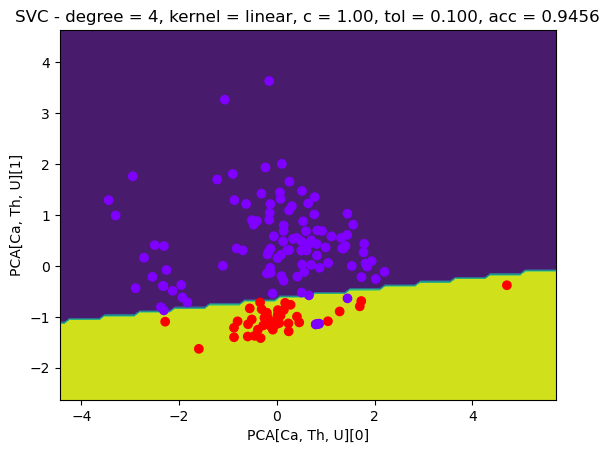

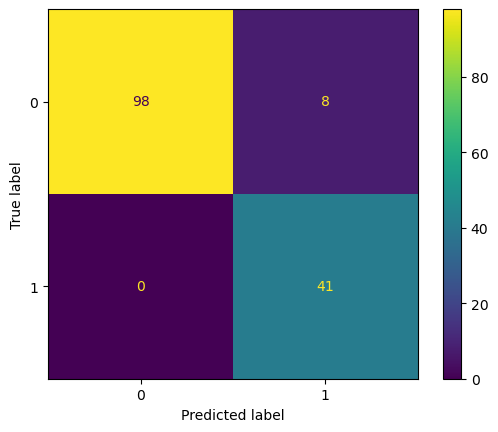

<Figure size 640x480 with 0 Axes>

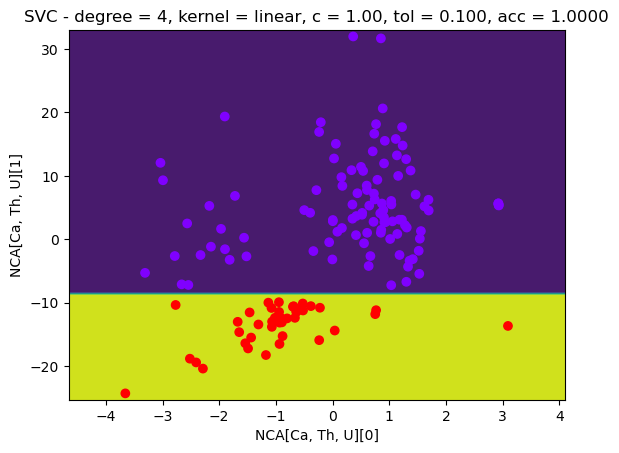

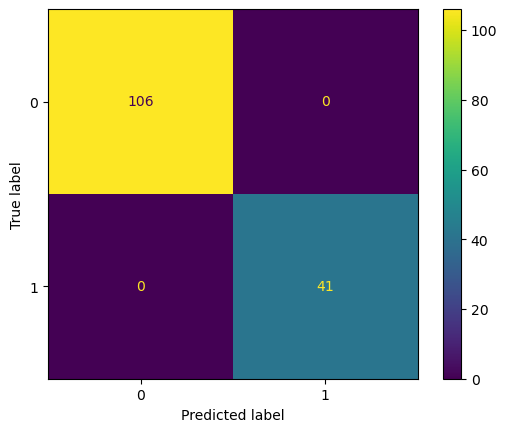

<Figure size 640x480 with 0 Axes>

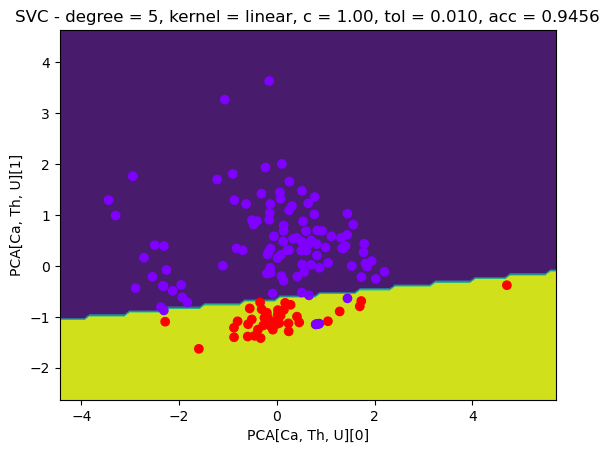

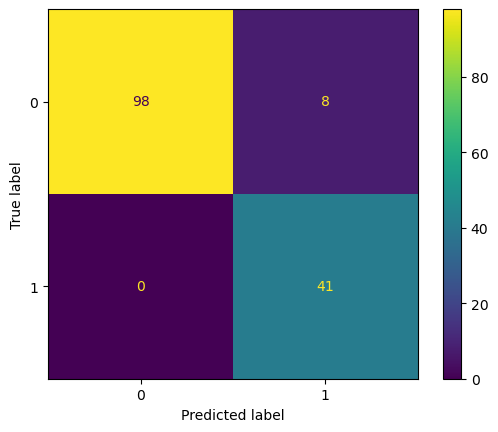

<Figure size 640x480 with 0 Axes>

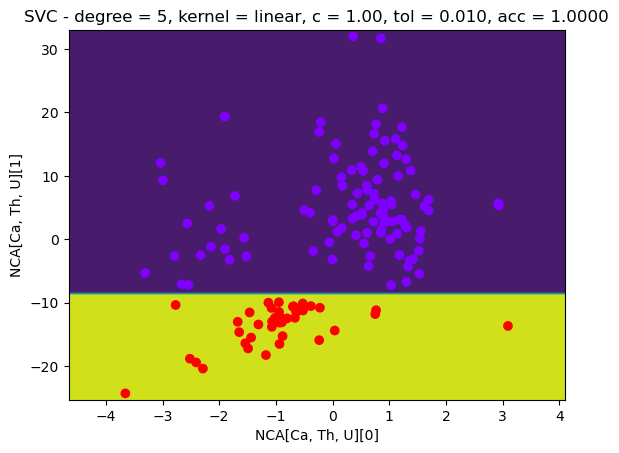

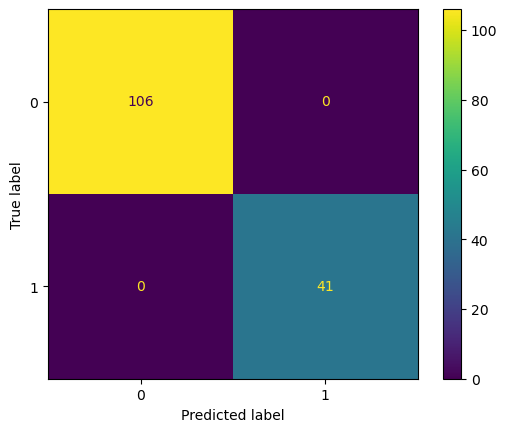

<Figure size 640x480 with 0 Axes>

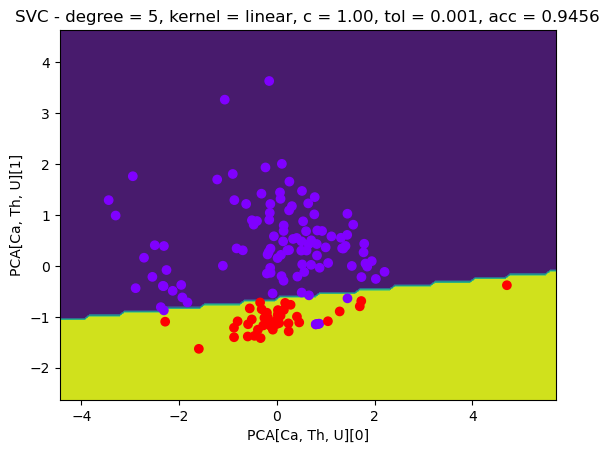

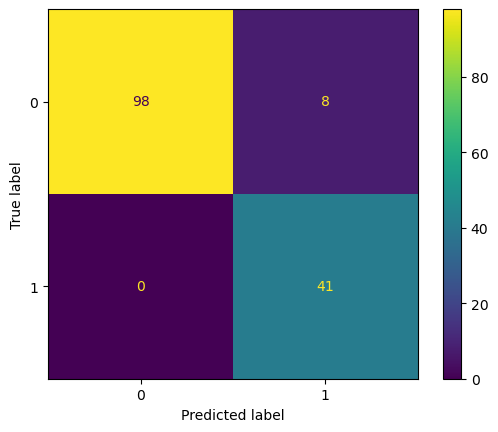

<Figure size 640x480 with 0 Axes>

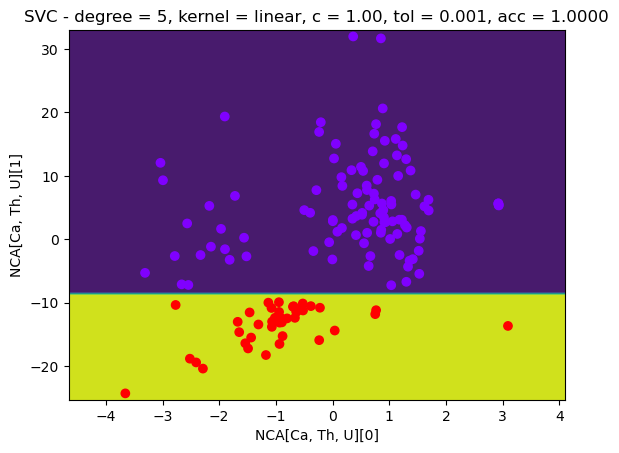

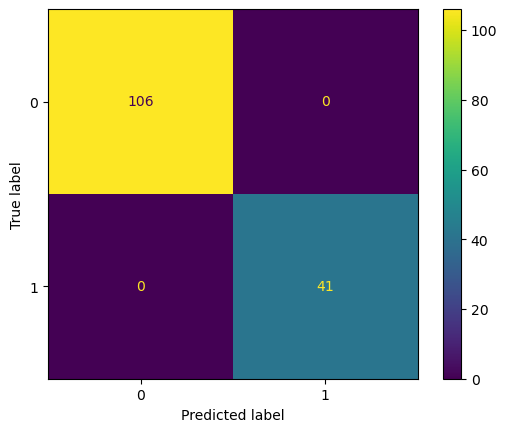

<Figure size 640x480 with 0 Axes>

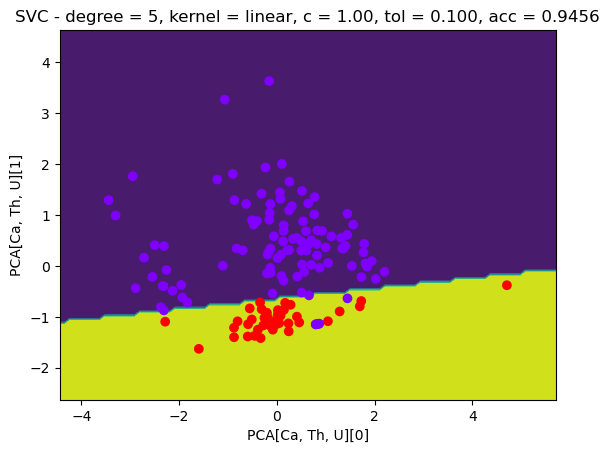

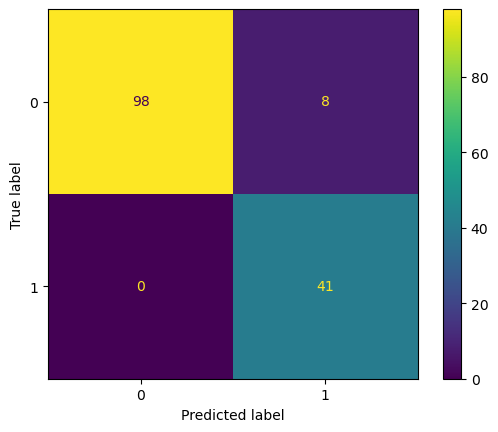

<Figure size 640x480 with 0 Axes>

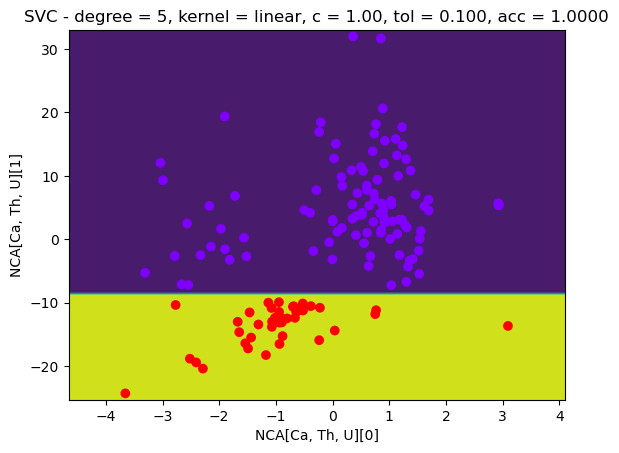

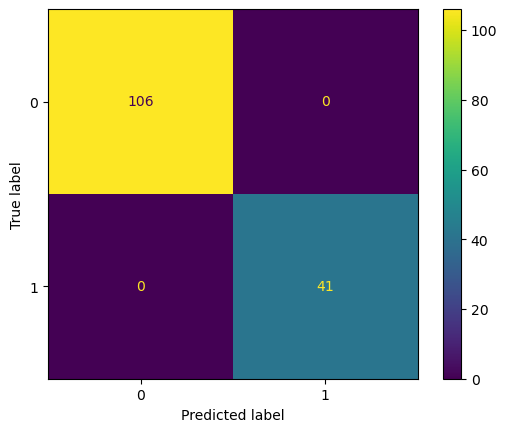

<Figure size 640x480 with 0 Axes>

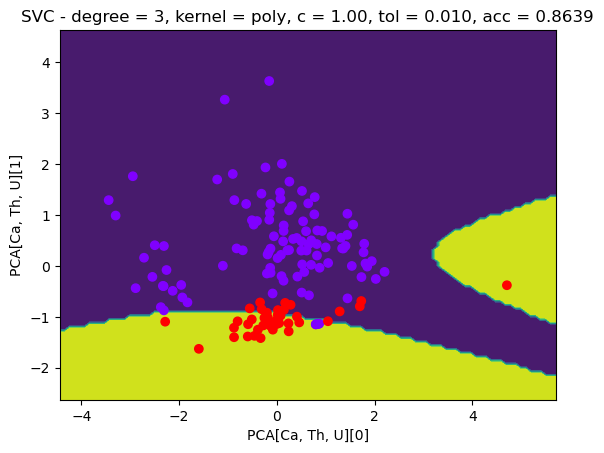

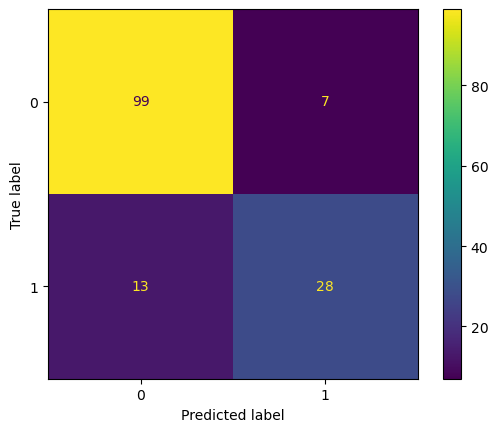

<Figure size 640x480 with 0 Axes>

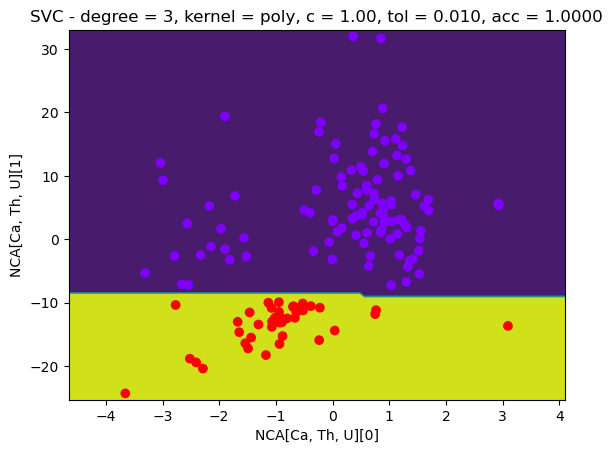

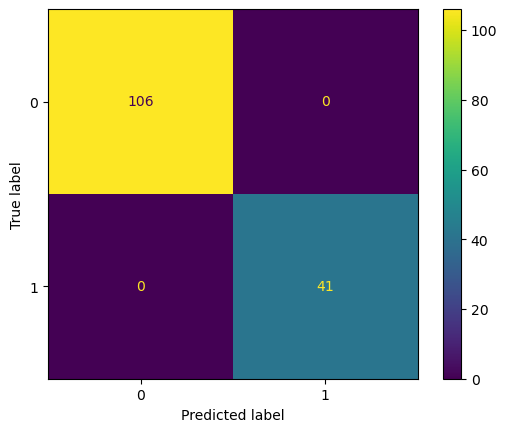

<Figure size 640x480 with 0 Axes>

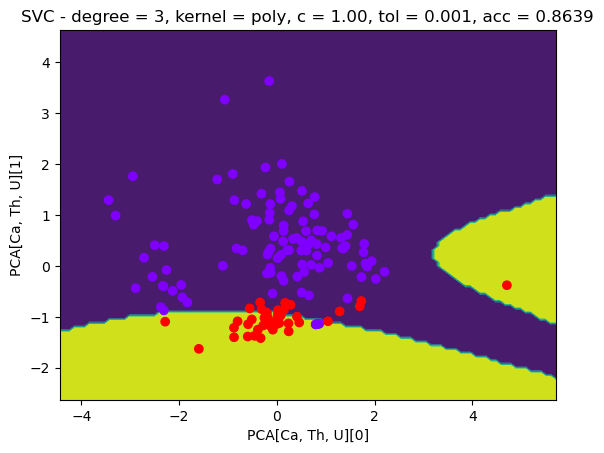

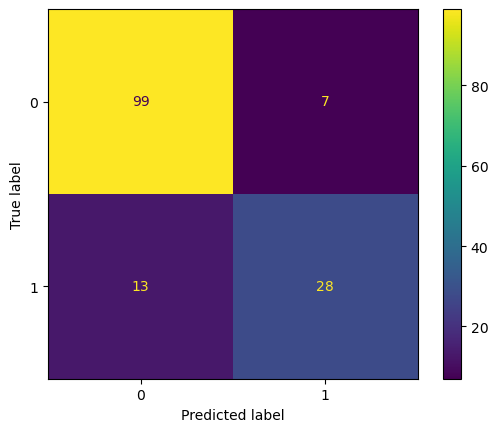

<Figure size 640x480 with 0 Axes>

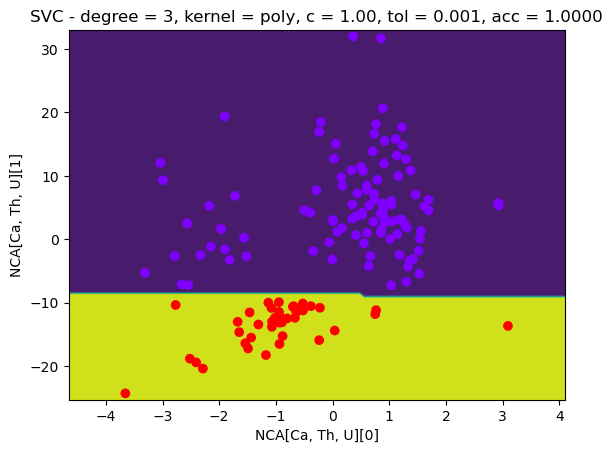

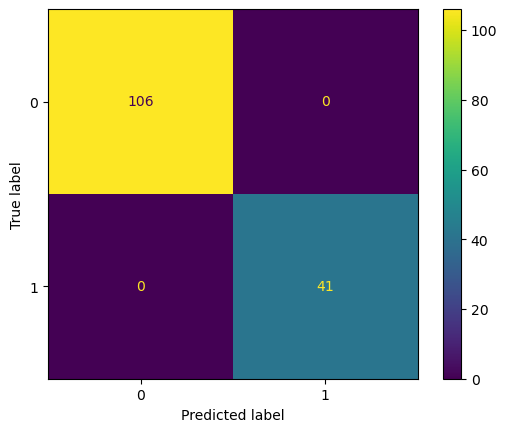

<Figure size 640x480 with 0 Axes>

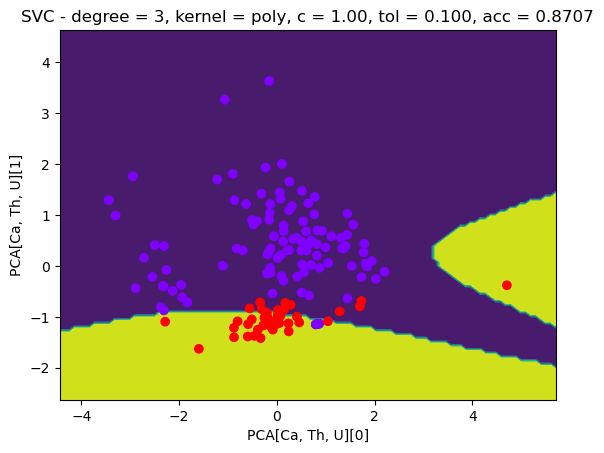

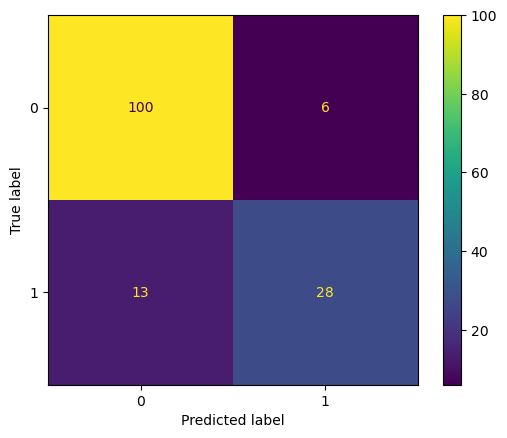

<Figure size 640x480 with 0 Axes>

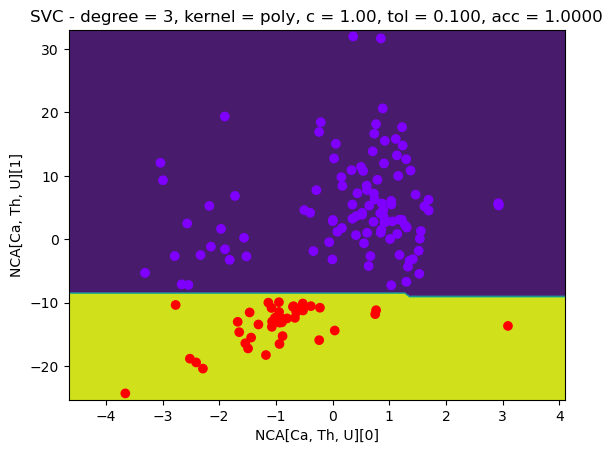

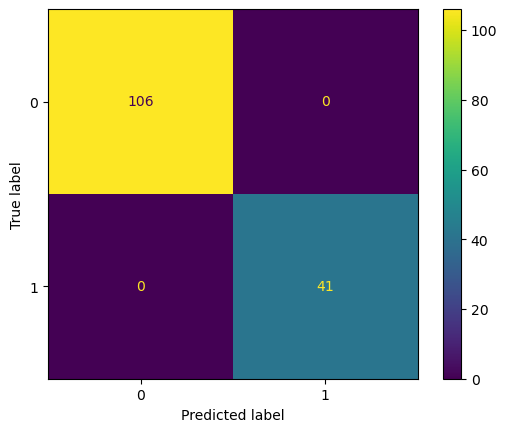

<Figure size 640x480 with 0 Axes>

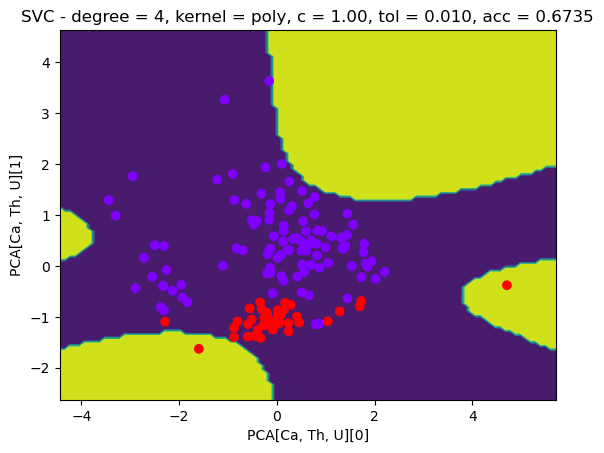

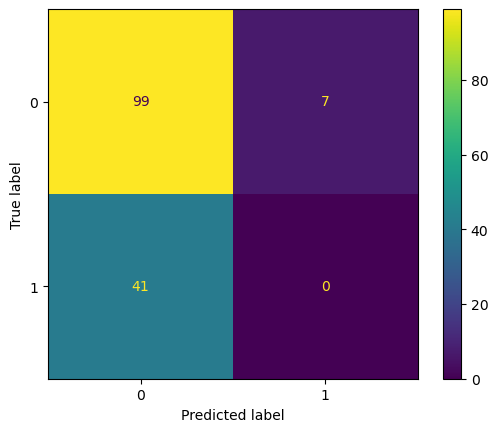

<Figure size 640x480 with 0 Axes>

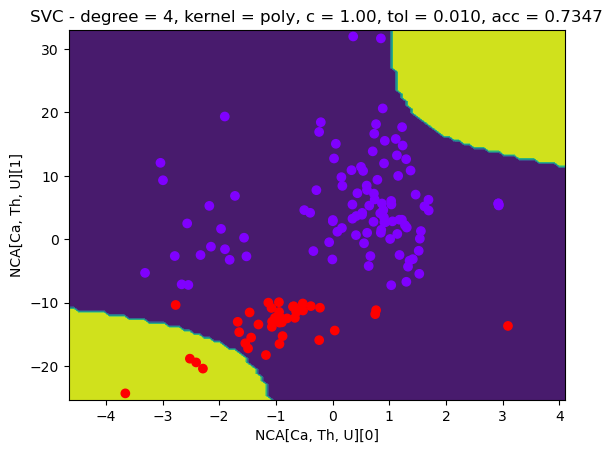

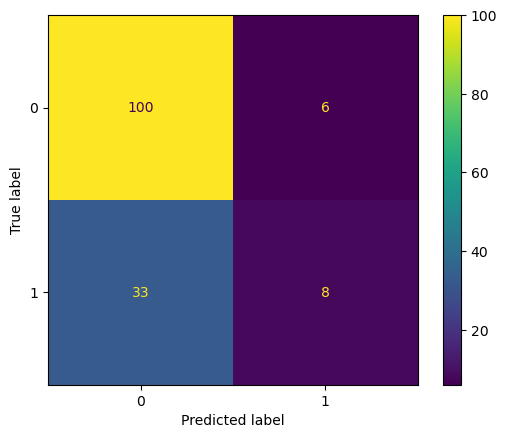

<Figure size 640x480 with 0 Axes>

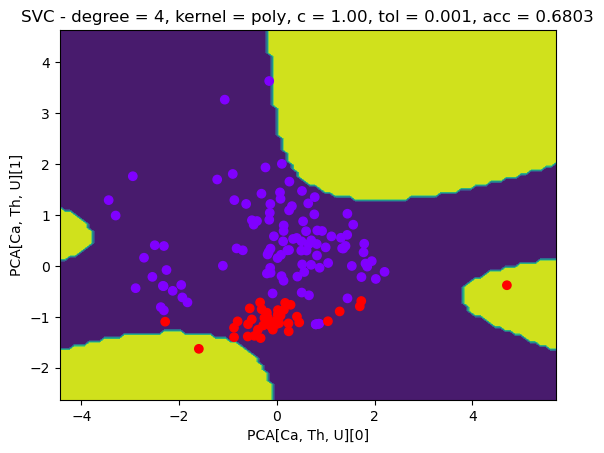

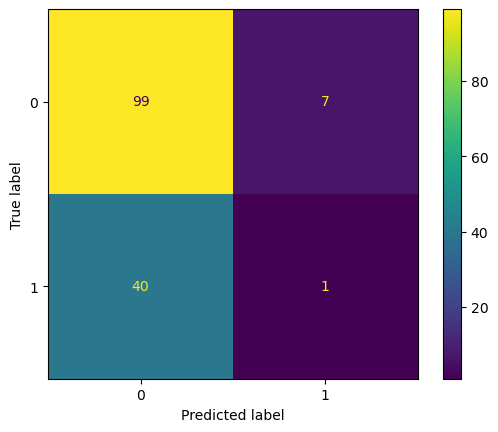

<Figure size 640x480 with 0 Axes>

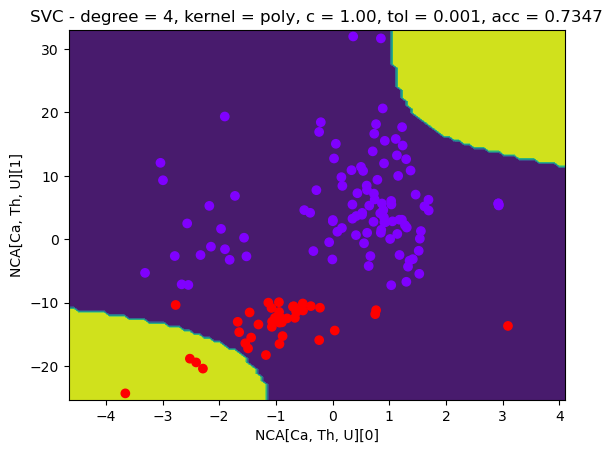

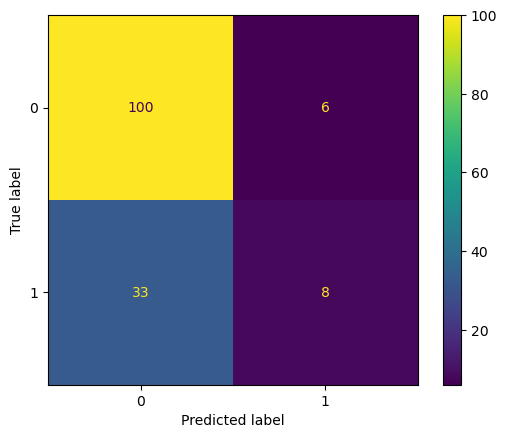

<Figure size 640x480 with 0 Axes>

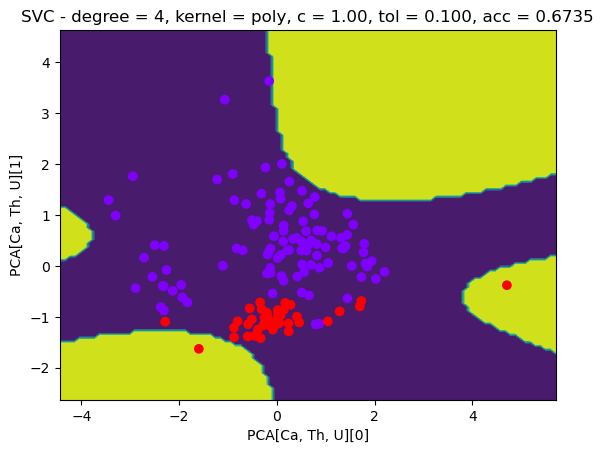

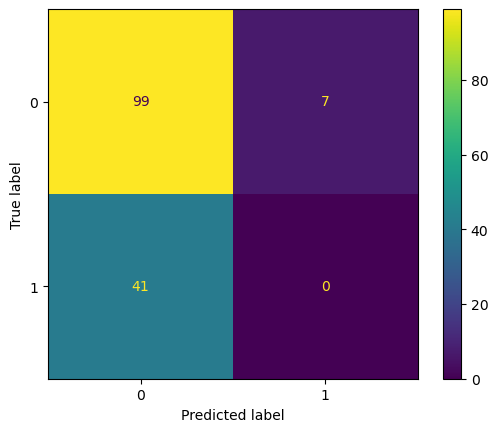

<Figure size 640x480 with 0 Axes>

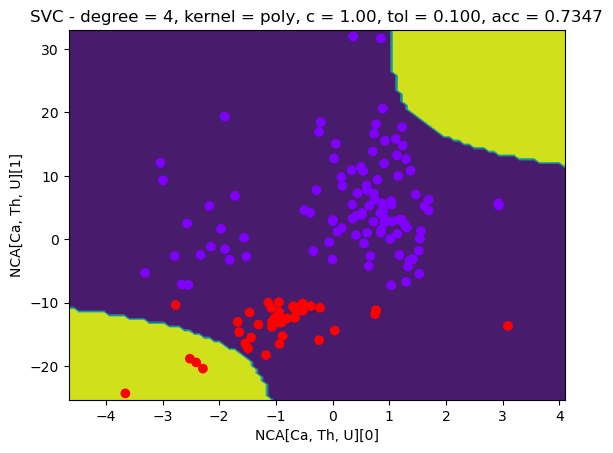

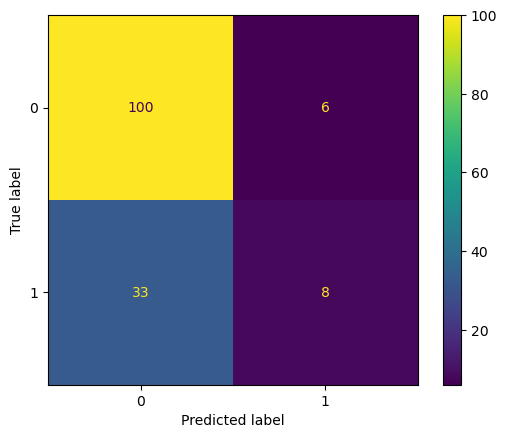

<Figure size 640x480 with 0 Axes>

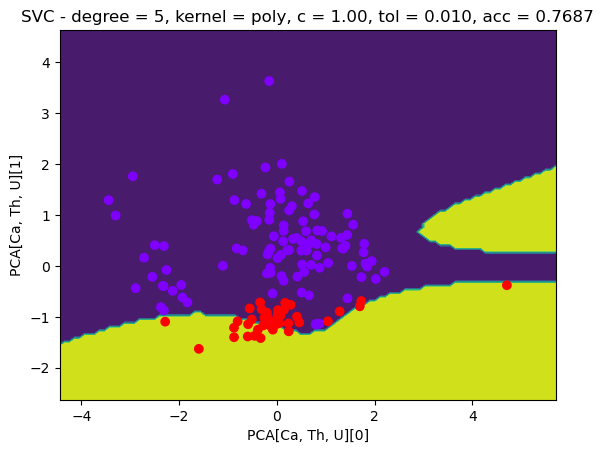

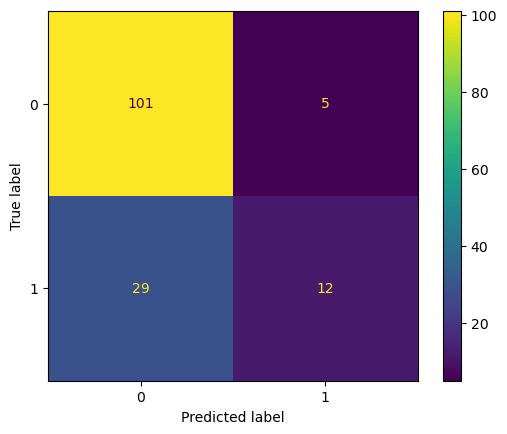

<Figure size 640x480 with 0 Axes>

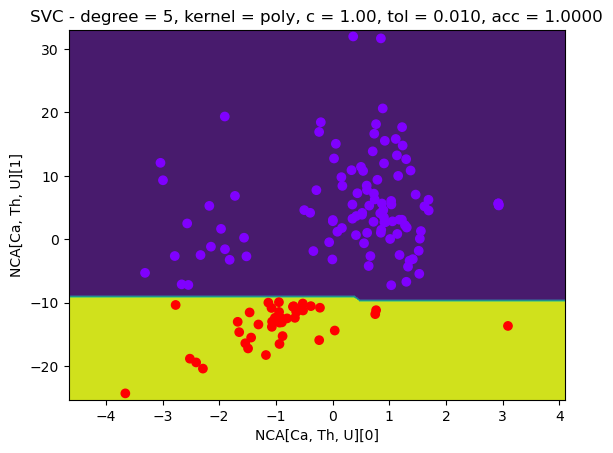

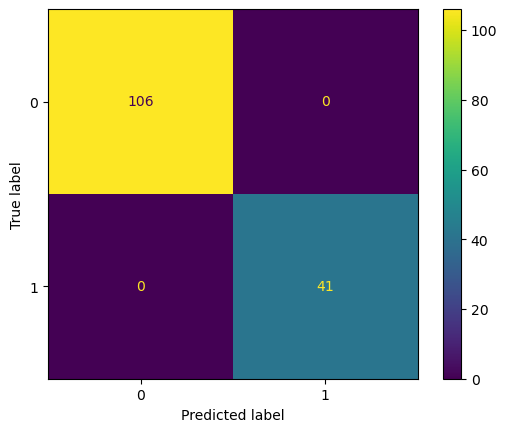

<Figure size 640x480 with 0 Axes>

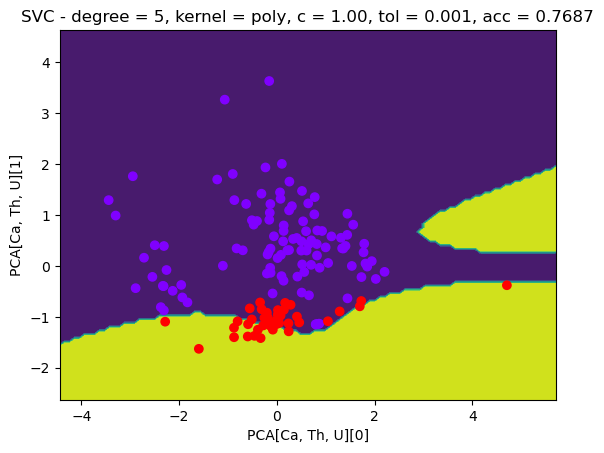

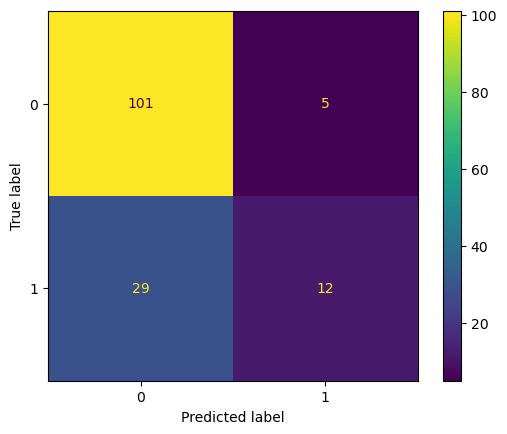

<Figure size 640x480 with 0 Axes>

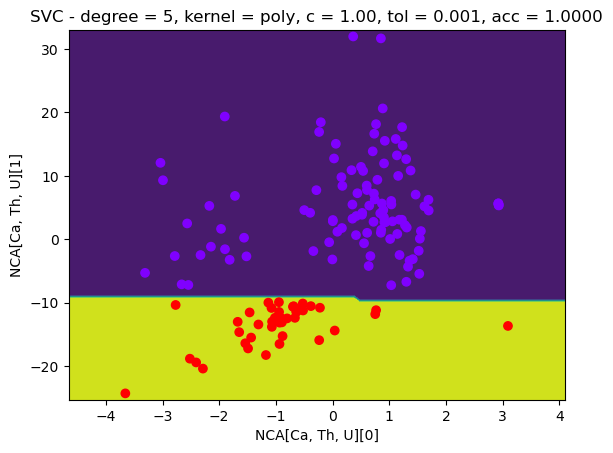

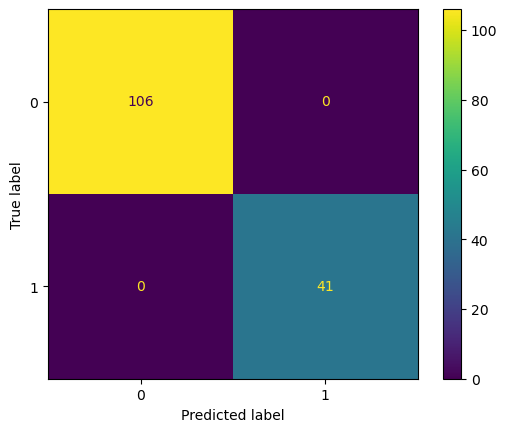

<Figure size 640x480 with 0 Axes>

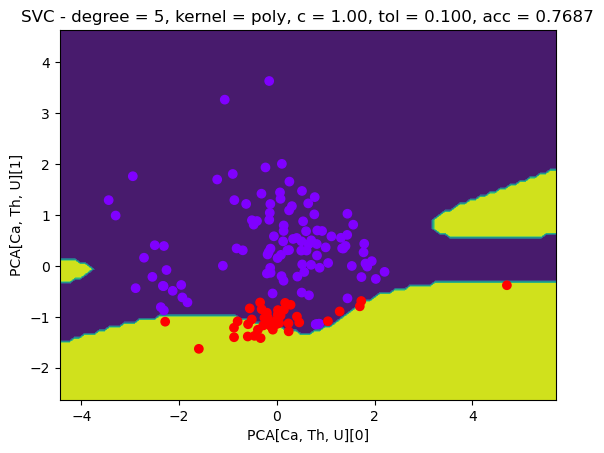

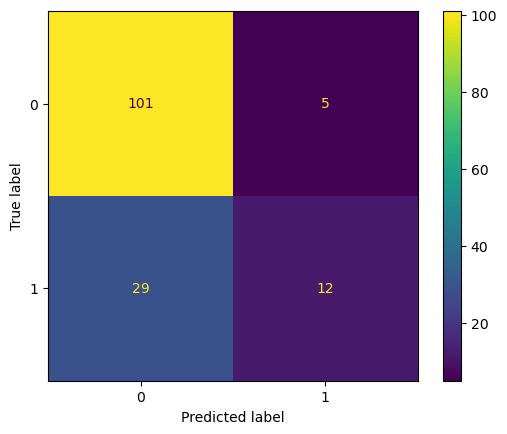

<Figure size 640x480 with 0 Axes>

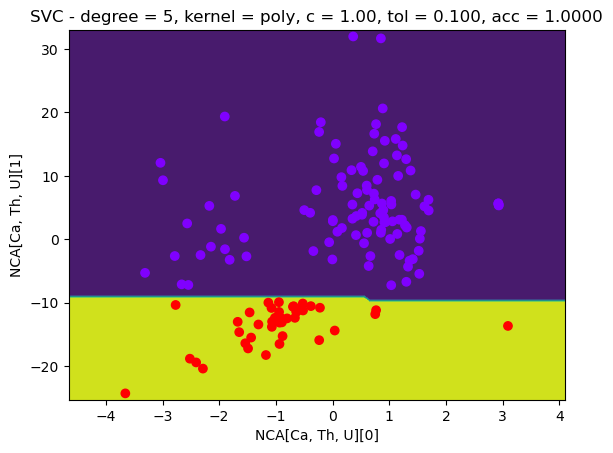

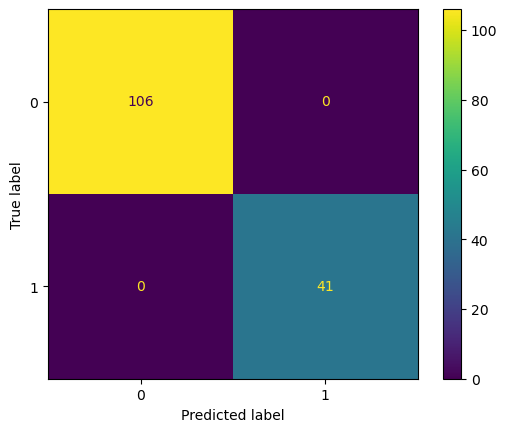

In [14]:
print("Decision Tree Classifier Visualizations \n")
X_columns = [['As', 'U', 'K'], ['U', 'Ni', 'K'], ['U', 'K']] #- works well ~98%
#X_columns = df_train[['U', 'K']] #- ~98%
#X_columns = df_train[['As', 'U', 'K', 'Ni']]
#X_columns = df_train[['As', 'La', 'Lu', 'Nd', 'Sm', 'U', 'Yb', 'Ce', 'Ni', 'Cr', 'Cs', 'Fe', 'K']]
#X_columns = list(X_df.columns)

#pca = make_pipeline(StandardScaler(), PCA(n_components=2))
#nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

#reductions = [("PCA", pca), ("NCA", nca)]

accs_DTC = []
pres_DTC = []
recs_DTC = []
class_labels_DTC = []
X_vars_DTC = []
#scores_DTC = []
accs_mean_DTC = []
pres_mean_DTC = []
recs_mean_DTC = []
#scores_mean_DTC = []
predictions_DTC = []
criterion_DTC = []
ccp_alpha_DTC = []

correlation = np.corrcoef(X_df, yt_map, rowvar=False)
correlation_df = pd.DataFrame(correlation, index = df_train.columns, columns = df_train.columns)

for p in range(2,3):
    #combs = list(combinations(X_columns, p))
    combs = X_columns
    for i in combs:
        i = list(i)
        X = df_train[i]
        X = np.asarray(X)
        for c in ['entropy']: #tried gini was slightly worse than entropy
            for j in range (0,6):
                if(j == 0 or j == 5):
                    j_sub = j / 100
                    #plt.figure()
                    dtc = DecisionTreeClassifier(criterion = c, ccp_alpha= j_sub)
                    criterion_DTC.append(c)
                    ccp_alpha_DTC.append(j_sub)
                    dtc.fit(X, yt_map)
                    yp_DTC = cross_val_predict(dtc, X, yt_map, cv = 5)
                    
                    print_tree(dtc, c, j_sub, i)
                    
                    cm = ConfusionMatrixDisplay.from_predictions(yt_map, yp_DTC)
                    plt.show()
                    
                    class_labels_DTC = dtc.classes_
                    X_vars_DTC.append(i)
                    accs_DTC.append(accuracy_score(yt_map, yp_DTC))
                    pres_DTC.append(precision_score(yt_map, yp_DTC, average='macro'))
                    recs_DTC.append(recall_score(yt_map, yp_DTC, average='macro'))
                    #print("criterion = " + i + ", ccp_alpha = " + str(j_sub))
                    #print('acc = %.3f, pre = %.3f, rec = %.3f' % (acc, pre, rec))
                    #plot_tree(model, filled=True)
                    #plt.show()

results_DTC = pd.DataFrame()
results_DTC['Train_Vars'] = X_vars_DTC
#results_DTC["Class_labels"] = class_labels_DTC
results_DTC["Accuracy"] = accs_DTC
results_DTC["Precision"] = pres_DTC
results_DTC["Recall"] = recs_DTC
results_DTC['Criterion'] = criterion_DTC
results_DTC['CCP_Alpha'] = ccp_alpha_DTC


X = df_train[['As', 'U', 'Cr', 'Eu', 'Ni', 'Sc', 'Th', 'Al', 'Ti']]


print("best knn params \n")
for p in range(9,10): # replaced with r when looping to find best params
    combs = list(combinations(X, p))
    #combs = X
    for i in combs:
        i = list(i)
        Xt = df_train[i]
    
        Xt = np.asarray(Xt)
        for n in range(2, 7):
            for met in metrics:
                '''
                    model = KMeans(n_clusters = n, algorithm='lloyd')
                    acc = accuracy_score(yt_map, yp)
                    rec = recall_score(yt_map, yp, average = 'macro')
                    pre = precision_score(yt_map, yp, average = 'macro')
                    '''
                    
                knn =  KNeighborsClassifier(n_neighbors=n, n_jobs=-1, algorithm = 'auto', metric = met)
                    
                for m, (name, model) in enumerate(reductions):
                    for v in range(100): #run for avg n times
                        X_train,X_test, y_train, y_test = train_test_split(Xt, yt_map, test_size=0.3, stratify=yt_map) 
                        model.fit(X_train, y_train)
                            
                        knn.fit(model.transform(X_train), y_train)
                            
                        yp = knn.predict(model.transform(X_test))
                            
                        acc_knn = knn.score(model.transform(X_test), y_test)
                            
                        X_embed = model.transform(Xt)
                            
                        accs_mean.append(accuracy_score(y_test, yp))
                        pres_mean.append(precision_score(y_test, yp, average='macro'))
                        recs_mean.append(recall_score(y_test, yp, average = 'macro'))
                        scores_mean.append(acc_knn)
        
                    class_labels.append(knn.classes_)
                    algorithms.append(knn.algorithm)
                    metrics_list.append(knn.effective_metric_)
                    knns.append(n)
                    X_vars.append(i)
                    score_mean = np.mean(scores_mean)
                    scores.append(score_mean)
                    reduction_methods.append(name)
                    accs.append(np.mean(accs_mean))
                    pres.append(np.mean(pres_mean))
                    recs.append(np.mean(recs_mean))
                      
                    scores_mean.clear()
                    pres_mean.clear()
                    recs_mean.clear()
                    accs_mean.clear()
                    
                    plt.figure()
                    DecisionBoundaryDisplay.from_estimator(knn, X_embed, response_method='predict')
                    plt.scatter(X_embed[:,0], X_embed[:,1], c=yt_map, cmap='rainbow')
                    plt.title("KNN = " + str(n) + ": Test Mean Accuracy = " + str(score_mean) + ", 100 iterations")
                    plt.xlabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + ", " + i[3] + ", " + i[4] + ", " + i[5] + ", " + i[6] + ", " + i[7] + ", " + i[8] + "]" + "[0]")
                    plt.ylabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + ", " + i[3] + ", " + i[4] + ", " + i[5] + ", " + i[6] + ", " + i[7] + ", " + i[8] + "]" + "[1]")
                       
                    cm = ConfusionMatrixDisplay.from_estimator(knn, model.transform(X_test), y_test)
                    plt.show()
results_KNN = pd.DataFrame()
results_KNN["Train_vars"] = X_vars
results_KNN['KNN'] = knns
results_KNN['Mean_Acc'] = scores
results_KNN["Reduction"] = reduction_methods
results_KNN["Accuracy"] = accs
results_KNN["Precision"] = pres
results_KNN["Recall"] = recs
results_KNN["Class_labels"] = class_labels
results_KNN["Algorithm"] = algorithms
results_KNN["Metric"] = metrics_list

print("SVC Viz \n")

X_columns = df_train[['Ca','Th','U']]

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

reductions = [("PCA", pca), ("NCA", nca)]

SVC_c = [1.0]
SVC_kernel = ['linear', 'poly'] #sigmoid and rbf don't work well
SVC_degree = [3, 4, 5]
SVC_gamma = ['scale']
SVC_coef = [0.0]
SVC_tol = [0.01, 0.001, 0.1]

SVC_c_list = []
SVC_kernel_list = []
SVC_degree_list = []
SVC_gamma_list = []
SVC_coef_list = []
SVC_tol_list = []

accs_SVC = []
pres_SVC = []
recs_SVC = []
scores_SVC = []
SVC_class_labels = []
for p in range(3,4):
    combs = list(combinations(X_columns, p))
    #combs = X
    for i in combs:
        i = list(i)
        X = df_train[i]
        X = np.asarray(X)
        for c in SVC_c:
            for j in SVC_kernel:
                for d in SVC_degree:
                    for g in SVC_gamma:
                        for co in SVC_coef:
                            for t in SVC_tol:
                                
                                svc = SVC(cache_size=1000, C=c, kernel=j, degree=d,
                                          gamma= g, coef0=co, tol=t)
                                
                                for m, (name, model) in enumerate(reductions):
                            
                                    model.fit(X, yt_map)
                                        
                                    #svc.fit(model.transform(X), yt_map)
                                        
                                    yp_SVC = cross_val_predict(svc, model.transform(X), yt_map)
                                        
                                    #acc_svc = svc.score(model.transform(X), y_test)
                                        
                                    X_embed = model.transform(X)
                                    acc = accuracy_score(yt_map, yp_SVC)
                                    
                                    SVC_class_labels.append(i)
                                    SVC_c_list.append(c)
                                    SVC_kernel_list.append(j)
                                    SVC_degree_list.append(d)
                                    SVC_gamma_list.append(g)
                                    SVC_coef_list.append(co)
                                    SVC_tol_list.append(t)
                                    accs_SVC.append(acc)
                                    pres_SVC.append(precision_score(yt_map, yp_SVC, average='macro'))
                                    recs_SVC.append(recall_score(yt_map, yp_SVC, average = 'macro'))
                                    #scores_SVC.append(acc_svc)
                                    
                                    plt.figure()
                                    svc.fit(model.transform(X), yt_map)
                                    DecisionBoundaryDisplay.from_estimator(svc, X_embed, response_method='predict')
                                    plt.scatter(X_embed[:,0], X_embed[:,1], c=yt_map, cmap='rainbow')
                                    plt.title('SVC - degree = %d, kernel = %s, c = %.2f, tol = %.3f, acc = %.4f' % (d, j, c, t, acc ))
                                    plt.xlabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + "]" + "[0]")
                                    plt.ylabel(name + "[" + i[0] + ", " + i[1] + ", " + i[2] + "]" + "[1]")
                                   
                                    cm = ConfusionMatrixDisplay.from_predictions(yt_map, yp_SVC)
                                    
                                    plt.show()
                                    
results_SVC = pd.DataFrame()
#results_DTC['Train_Vars'] = X_vars_DTC
results_SVC["Class_labels"] = SVC_class_labels
results_SVC["Accuracy"] = accs_SVC
results_SVC["Precision"] = pres_SVC
results_SVC["Recall"] = recs_SVC
results_SVC['C'] = SVC_c_list
results_SVC['Kernel'] = SVC_kernel_list
results_SVC['Degree'] = SVC_degree_list
results_SVC['Gamma'] = SVC_gamma_list
results_SVC['Coef'] = SVC_coef_list
results_SVC['Tolerance'] = SVC_tol_list

# analyze / explain experimental results

After trying KNN, DTC, and SVC with many different parameters, I found that the best performing model was the SVC at 100%. I could get KNN to near 100%, up to 99.97% classification accuracy, by finding the best combinations of attributes through the method described in the experimentation section. For each combination I performed a PCA and Neighborhood Combonent Analysis by implementing a SKlearn pipeline. The DTC performed the worst out of the three models, and for the ones that performed the best, they had high depth, so I had to prune them to account for overfitting. I could get about a 98% accuracy, precision, and recall when using 3 different parameters without any reduction methods. Interestingly, the model didn't perform any better with more attributes. All of the models that performed well included the element Uranium, which is interesting, and makes sense because Uranium occurs at significantly different levels in different areas of the world. The other radioactive element that I found worked well was Th(Thorium), specifically for KNN. Two of the more suprising elements that worked well for KNN was Eu(Europium) and Sc(Scandium), which are both trace rare earth elements. From what I saw in the studies in my sources they did mention the fact that trace elements were better for determining the location of an artifact. Surprisingly I was able to get better results than the people who conducted this study [link](https://www.sciencedirect.com/science/article/pii/S2352409X23001700) trying to do the same thing with pottery from Italy, however they also had less elements to work with.

# conclusion 

In conclusion, my classification of Maya pottery from the Bishop and Lyle datasets was surprisingly affective. I could get 100% accuracy by using an SVC on the NCA of Calcium(Ca), Thorium(Th), and Uranium(U), which was very similar to the elements that worked well with the KNN classification algorithm. I am interested in using different applications of machine learning on other parts of Archeology and Anthropology, such as Computer Vision. My results prove that there could be further research into using these algorithms to classify pottery of unknown origin, or very fragmented pottery that is hard to identify through normal means. It will also be interesting to see if these algorithms can be used on a wider geographic setting with multiple different possible classifications, instead of a single area with two possibilities. I would say that the results show that it may be achievable with the correct analysis and reduction methods. 

# Sources

Bishop dataset\
[link](https://archaeometry.missouri.edu/murr_database.html)   
Shows up if you search 1995  
INAA of Samples of Mayan Pottery for Ronald Bishop in 1995 at MURR\
Unpublished research by Ronald Bishop\
	Bishop, R.L.

***

Lyle dataset  
[link](https://archaeometry.missouri.edu/murr_database.html)  
*Shows up if you search 2000*  
Investigating Social Inequality: A Comparative Analysis of Late Classic Maya Residential Sites in the Three Rivers Region  
Unpublished M.A. thesis, Department of Anthropology, University of Texas at San Antonio  
	Lyle, A.S. 	Pottery

***

Elisavet Charalambous, Maria Dikomitou-Eliadou, Georgios M. Milis, Georgios Mitsis, Demetrios G. Eliades,  
An experimental design for the classification of archaeological ceramic data from Cyprus, and the tracing of inter-class relationships,  
Journal of Archaeological Science: Reports,  
Volume 7,  
2016,  
Pages 465-471,  
ISSN 2352-409X,  
doi: [link](https://doi.org/10.1016/j.jasrep.2015.08.010.)  
sciencedirect: [link](https://www.sciencedirect.com/science/article/pii/S2352409X15300699)  
Keywords: Experimental design; Ancient pottery analysis; Classification; Compositional analysis; Statistical testing

***

G. Ruschioni, D. Malchiodi, A.M. Zanaboni, L. Bonizzoni,  
Supervised learning algorithms as a tool for archaeology: Classification of ceramic samples described by chemical element concentrations,  
Journal of Archaeological Science: Reports,  
Volume 49,  
2023,  
103995,  
ISSN 2352-409X,  
[link](https://doi.org/10.1016/j.jasrep.2023.103995.)  
[link](https://www.sciencedirect.com/science/article/pii/S2352409X23001700)  
Abstract: Ceramic provenance studies often use minor and trace elements to gather knowledge about the presence of local furnaces and commercial trades.   There are various chemical techniques that can be used to determine the elemental composition of ceramics, either non-destructively or by requiring   samples. From these data, researchers can often determine provenance, and then use multivariate analyses with geological and archaeological information   to classify the ceramics. In this study, we aimed to demonstrate the potential of supervised Machine Learning techniques to classify ceramic samples   based on their chemical element concentrations. We applied several supervised learning algorithms to a set of 36 fragments whose archaeological   classification was already known, using chemical analysis data that had been verified through previous studies. We carried out different sets of   experiments, exploiting in different ways the available data, and evaluated the performance of the adopted algorithms, to propose new tools for ceramics   provenance studies in archaeology. Our results show that machine learning can be a reliable and useful tool for archaeological classification based on   chemical analysis data, providing a reliable and schematic picture of archaeological findings.  
Keywords: Machine learning; Supervised classification; Provenance; Ancient pottery; ED-XRF  

